<a href="https://colab.research.google.com/github/joosk3R/jskRprac/blob/main/dacon_e_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/train.csv")

FileNotFoundError: ignored

In [ ]:
test = pd.read_csv("/content/test.csv")
sample = pd.read_csv("/content/sample_submission.csv")

In [ ]:
df = pd.DataFrame()

In [ ]:
df["date"] = train['일시'].apply(lambda x : int(x[0:8]))

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with a column named 'date' containing date values
# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Create a new column 'is_weekend' indicating weekends as 1 and weekdays as 0
df['is_weekend'] = df['date'].dt.dayofweek // 5

# Output the modified DataFrame
print(df)

             date  is_weekend
0      2022-06-01           0
1      2022-06-01           0
2      2022-06-01           0
3      2022-06-01           0
4      2022-06-01           0
...           ...         ...
203995 2022-08-24           0
203996 2022-08-24           0
203997 2022-08-24           0
203998 2022-08-24           0
203999 2022-08-24           0

[204000 rows x 2 columns]


In [ ]:
bd = pd.read_csv("/content/building_info.csv")

In [ ]:
train["강수량(mm)"] = train["강수량(mm)"].fillna(0)
train["일사(MJ/m2)"] = train["일사(MJ/m2)"].fillna(0)
train["일조(hr)"] = train["일조(hr)"].fillna(0)
train["풍속(m/s)"] = train["풍속(m/s)"].fillna(method='bfill')
train["습도(%)"] = train["습도(%)"].fillna(method='bfill')

In [ ]:
train['month'] = train['일시'].apply(lambda x : int(x[4:6]))
train['day'] = train['일시'].apply(lambda x : int(x[6:8]))
train['time'] = train['일시'].apply(lambda x : int(x[9:11]))

In [ ]:
test['month'] = test['일시'].apply(lambda x : int(x[4:6]))
test['day'] = test['일시'].apply(lambda x : int(x[6:8]))
test['time'] = test['일시'].apply(lambda x : int(x[9:11]))

In [ ]:
train_x = train.drop(columns=['num_date_time', '일시', '일조(hr)', '일사(MJ/m2)'])
train_y = train['전력소비량(kWh)']

In [ ]:
test_x = test.drop(columns=['num_date_time', '일시'])


In [ ]:
train_x['is_weekend']  =df["is_weekend"]
train_x['is_working_hour'] = train_x['time'].apply(lambda x: 1 if 7 <= x <= 21 else 0)

test_x['is_weekend']  =df["is_weekend"]
test_x['is_working_hour'] = test_x['time'].apply(lambda x: 1 if 7 <= x <= 21 else 0)


In [ ]:
import pandas as pd

# Assuming you have already loaded your data into df1 and df2

# Merge df1 and df2 on "Building Number" column
train_df = train_x.merge(bd, on="건물번호", how="inner")
test_df = test_x.merge(bd, on="건물번호", how="inner")


In [ ]:
y = train_df["전력소비량(kWh)"]


In [ ]:
train_df = train_df.drop(columns=["전력소비량(kWh)", 'month','day','time'])
test_df = test_df.drop(columns=[ 'month','day','time'])

In [ ]:
train_dum = pd.get_dummies(train_df, columns = ['is_working_hour','is_weekend','건물유형'])
test_dum = pd.get_dummies(test_df, columns = ['is_working_hour','is_weekend','건물유형'])
train_dum.head()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),...,건물유형_대학교,건물유형_데이터센터,건물유형_백화점및아울렛,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_지식산업센터,건물유형_할인마트,건물유형_호텔및리조트
0,1,18.6,0.0,0.9,42.0,110634.0,39570.0,-,-,-,...,0,0,0,0,0,0,0,0,0,0
1,1,18.0,0.0,1.1,45.0,110634.0,39570.0,-,-,-,...,0,0,0,0,0,0,0,0,0,0
2,1,17.7,0.0,1.5,45.0,110634.0,39570.0,-,-,-,...,0,0,0,0,0,0,0,0,0,0
3,1,16.7,0.0,1.4,48.0,110634.0,39570.0,-,-,-,...,0,0,0,0,0,0,0,0,0,0
4,1,18.4,0.0,2.8,43.0,110634.0,39570.0,-,-,-,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_X = train_dum.drop(columns=['건물번호','태양광용량(kW)', 'ESS저장용량(kWh)','강수량(mm)',
       'PCS용량(kW)',])
test_X = test_dum.drop(columns=['건물번호','태양광용량(kW)', 'ESS저장용량(kWh)','강수량(mm)',
       'PCS용량(kW)',])

In [ ]:
from sklearn.preprocessing import Normalizer # 정규화

norm = Normalizer()
X_train_scaled = norm.fit_transform(train_X.iloc[:,0:5])
X_test_scaled = norm.transform(test_X.iloc[:,0:5])

In [ ]:
train_scaled = pd.DataFrame(data = X_train_scaled)
test_scaled = pd.DataFrame(data = X_test_scaled)

In [ ]:
train_xx = pd.concat([train_scaled,train_X.iloc[:,5:]],axis=1)
test_xx = pd.concat([test_scaled,test_X.iloc[:,5:]],axis=1)

In [ ]:
train_xx

,0,1,2,3,4,is_working_hour_0,is_working_hour_1,is_weekend_0,is_weekend_1,건물유형_건물기타,...,건물유형_대학교,건물유형_데이터센터,건물유형_백화점및아울렛,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_지식산업센터,건물유형_할인마트,건물유형_호텔및리조트
0,0.000158,0.000008,0.000357,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.000153,0.000009,0.000383,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.000151,0.000013,0.000383,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000142,0.000012,0.000409,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.000157,0.000024,0.000366,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,0.000330,0.000013,0.001227,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203996,0.000320,0.000019,0.001227,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203997,0.000304,0.000014,0.001313,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203998,0.000300,0.000004,0.001342,0.820659,0.571417,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
test_xx

,0,1,2,3,4,is_working_hour_0,is_working_hour_1,is_weekend_0,is_weekend_1,건물유형_건물기타,...,건물유형_대학교,건물유형_데이터센터,건물유형_백화점및아울렛,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_지식산업센터,건물유형_할인마트,건물유형_호텔및리조트
0,0.000200,0.000019,0.000613,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.000196,0.000008,0.000613,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.000193,0.000013,0.000638,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000188,0.000011,0.000664,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.000186,0.000009,0.000655,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,0.000321,0.000013,0.001199,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16796,0.000295,0.000006,0.001356,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16797,0.000288,0.000006,0.001399,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16798,0.000287,0.000016,0.001384,0.820659,0.571417,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y

0         1085.28
1         1047.36
2          974.88
3          953.76
4          986.40
           ...   
203995     881.04
203996     798.96
203997     825.12
203998     640.08
203999     540.24
Name: 전력소비량(kWh), Length: 204000, dtype: float64

In [ ]:
!pip install autogluon

In [ ]:
train_x = pd.concat([train_xx,y],axis=1)
test_x = test_xx

In [ ]:
test_x

,0,1,2,3,4,is_working_hour_0,is_working_hour_1,is_weekend_0,is_weekend_1,건물유형_건물기타,...,건물유형_대학교,건물유형_데이터센터,건물유형_백화점및아울렛,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_지식산업센터,건물유형_할인마트,건물유형_호텔및리조트
0,0.000200,0.000019,0.000613,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.000196,0.000008,0.000613,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.000193,0.000013,0.000638,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000188,0.000011,0.000664,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.000186,0.000009,0.000655,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,0.000321,0.000013,0.001199,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16796,0.000295,0.000006,0.001356,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16797,0.000288,0.000006,0.001399,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16798,0.000287,0.000016,0.001384,0.820659,0.571417,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
import os
import pandas as pd
import random
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
import autogluon.core as ag

import warnings
warnings.filterwarnings("ignore")

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(69)


In [ ]:
train_data = TabularDataset(train_x)
test_data = TabularDataset(test_x)

In [ ]:
label = '전력소비량(kWh)'
eval_metric = 'rmse'
time_limit = 3600*2

In [ ]:
excluded_model_types = ['CAT']
predictor = TabularPredictor(
    label=label, problem_type='regression', eval_metric=eval_metric
).fit(train_data,
      presets='best_quality',
      num_stack_levels=3,
      excluded_model_types = excluded_model_types,
      time_limit=time_limit, num_gpus=1)

In [ ]:
model_to_use = predictor.get_model_best()
model_pred = predictor.predict(test_data, model=model_to_use)

submission = pd.read_csv('/content/sample_submission.csv')

submission["전화해지여부"] = model_pred
submission.to_csv('./Gluon_submission.csv', index=False, encoding="utf-8")

autogluon결과 전체 데이터를 사용하면 예측력이 떨어짐 시계열 형태로
 각각의 건물마다 데이터를
 추정해주는것이 좋을 것 같음

---



In [1]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 14.5 MB/s eta 0:00:00


In [2]:
import sys
import sktime
import tqdm as tq
import xgboost as xgb
import matplotlib
import seaborn as sns
import sklearn as skl
import pandas as pd
import numpy as np
print("-------------------------- Python & library version --------------------------")
print("Python version: {}".format(sys.version))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(matplotlib.__version__))
print("tqdm version: {}".format(tq.__version__))
print("sktime version: {}".format(sktime.__version__))
print("xgboost version: {}".format(xgb.__version__))
print("seaborn version: {}".format(sns.__version__))
print("scikit-learn version: {}".format(skl.__version__))
print("------------------------------------------------------------------------------")

-------------------------- Python & library version --------------------------
Python version: 3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]
pandas version: 1.5.3
numpy version: 1.22.4
matplotlib version: 3.7.1
tqdm version: 4.65.0
sktime version: 0.21.0
xgboost version: 1.7.6
seaborn version: 0.12.2
scikit-learn version: 1.2.2
------------------------------------------------------------------------------


In [3]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from xgboost import XGBRegressor

pd.set_option('display.max_columns', 30)

In [ ]:
train = pd.read_csv('/content/train.csv')

FileNotFoundError: ignored

In [ ]:
train = train.drop(columns=["num_date_time",'일사(MJ/m2)'])

In [ ]:
bd=pd.read_csv("/building_info.csv")

In [ ]:
train_df = train.merge(bd, on="건물번호", how="inner")


In [ ]:
train_df

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,건물기타,110634.00,39570.00,-,-,-
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,건물기타,110634.00,39570.00,-,-,-
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,건물기타,110634.00,39570.00,-,-,-
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,건물기타,110634.00,39570.00,-,-,-
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,건물기타,110634.00,39570.00,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,881.04,호텔및리조트,57497.84,40035.23,-,-,-
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,798.96,호텔및리조트,57497.84,40035.23,-,-,-
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,825.12,호텔및리조트,57497.84,40035.23,-,-,-
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,640.08,호텔및리조트,57497.84,40035.23,-,-,-


In [ ]:
test_df = test_x.merge(bd, on="건물번호", how="inner")

NameError: ignored

In [ ]:
train_df = train_df.drop(columns=["건물유형", "연면적(m2)" ,"냉방면적(m2)","PCS용량(kW)"])

In [ ]:
train = train_df

In [ ]:
train_df = train_df.drop(columns=['month','day','time'])
test_df = test_df.drop(columns=[ 'month','day','time'])

In [ ]:
train

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),전력소비량(kWh),태양광용량(kW),ESS저장용량(kWh)
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,-,-
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,-,-
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,-,-
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,-,-
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,-,-
...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,881.04,-,-
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,798.96,-,-
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,825.12,-,-
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,640.08,-,-


In [ ]:
train

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),전력소비량(kWh),태양광용량(kW),ESS저장용량(kWh)
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,-,-
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,-,-
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,-,-
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,-,-
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,-,-
...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,881.04,-,-
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,798.96,-,-
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,825.12,-,-
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,640.08,-,-


In [ ]:
train = pd.read_csv("/train.csv")

In [ ]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [ ]:
train.columns

Index(['건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '일조(hr)',
       '전력소비량(kWh)', '태양광용량(kW)', 'ESS저장용량(kWh)'],
      dtype='object')

In [ ]:
## 변수들을 영문명으로 변경
cols = ['num', 'date_time',  'temp','prec', 'wind',"hum",'sun','power', 'non_elec', 'solar']
train.columns = cols

# 시간 관련 변수들 생성
date = pd.to_datetime(train.date_time)
train['hour'] = date.dt.hour
train['day'] = date.dt.weekday
train['month'] = date.dt.month
train['week'] = date.dt.weekofyear

#######################################
## 건물별, 요일별, 시간별 발전량 평균 넣어주기
#######################################
power_mean = pd.pivot_table(train, values = 'power', index = ['num', 'hour', 'day'], aggfunc = np.mean).reset_index()
tqdm.pandas()
train['day_hour_mean'] = train.progress_apply(lambda x : power_mean.loc[(power_mean.num == x['num']) & (power_mean.hour == x['hour']) & (power_mean.day == x['day']) ,'power'].values[0], axis = 1)



<ipython-input-65-f6782bb1e542>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['week'] = date.dt.weekofyear
100%|██████████| 204000/204000 [02:08<00:00, 1586.54it/s]


In [ ]:
#######################################
## 건물별 시간별 발전량 평균 넣어주기
#######################################
power_hour_mean = pd.pivot_table(train, values = 'power', index = ['num', 'hour'], aggfunc = np.mean).reset_index()
tqdm.pandas()
train['hour_mean'] = train.progress_apply(lambda x : power_hour_mean.loc[(power_hour_mean.num == x['num']) & (power_hour_mean.hour == x['hour']) ,'power'].values[0], axis = 1)



100%|██████████| 204000/204000 [01:22<00:00, 2486.82it/s]


In [ ]:
train.columns

Index(['num', 'date_time', 'temp', 'prec', 'wind', 'hum', 'sun', 'power',
       'non_elec', 'solar', 'hour', 'day', 'month', 'week', 'day_hour_mean',
       'hour_mean'],
      dtype='object')

In [ ]:
#######################################
## 건물별 시간별 발전량 표준편차 넣어주기
#######################################
power_hour_std = pd.pivot_table(train, values = 'power', index = ['num', 'hour'], aggfunc = np.std).reset_index()
tqdm.pandas()
train['hour_std'] = train.progress_apply(lambda x : power_hour_std.loc[(power_hour_std.num == x['num']) & (power_hour_std.hour == x['hour']) ,'power'].values[0], axis = 1)



100%|██████████| 204000/204000 [01:21<00:00, 2512.98it/s]


In [ ]:
train

,num,date_time,temp,prec,wind,hum,sun,power,non_elec,solar,hour,day,month,week,day_hour_mean,hour_std
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,-,-,0,2,6,22,1774.744615,446.882767
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,-,-,1,2,6,22,1687.347692,439.662704
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,-,-,2,2,6,22,1571.483077,412.071906
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,-,-,3,2,6,22,1522.153846,391.205981
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,-,-,4,2,6,22,1506.793846,381.099697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,881.04,-,-,19,2,8,34,964.873846,161.399578
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,798.96,-,-,20,2,8,34,882.184615,137.566008
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,825.12,-,-,21,2,8,34,779.095385,128.300189
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,640.08,-,-,22,2,8,34,663.267692,112.464079


In [ ]:
### 공휴일 변수 추가
train['holiday'] = train.apply(lambda x : 0 if x['day']<5 else 1, axis = 1)
train.loc[('20220815'<=train.date_time)&(train.date_time<'20220816'), 'holiday'] = 1



In [ ]:
train["holiday"].sum()

57600

In [ ]:
## https://dacon.io/competitions/official/235680/codeshare/2366?page=1&dtype=recent
train['sin_time'] = np.sin(2*np.pi*train.hour/24)
train['cos_time'] = np.cos(2*np.pi*train.hour/24)

## https://dacon.io/competitions/official/235736/codeshare/2743?page=1&dtype=recent
train['THI'] = 9/5*train['temp'] - 0.55*(1-train['hum']/100)*(9/5*train['hum']-26)+32


In [ ]:
train

,num,date_time,temp,wind,hum,prec,sun,power,non_elec,solar,hour,day,month,week,day_hour_mean,hour_mean,hour_std,holiday,sin_time,cos_time,THI
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,-,-,0,2,6,22,1774.744615,1706.318118,446.882767,0,0.000000,1.000000,78.768319
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,-,-,1,2,6,22,1687.347692,1622.620235,439.662704,0,0.258819,0.965926,77.465679
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,-,-,2,2,6,22,1571.483077,1506.971294,412.071906,0,0.500000,0.866025,76.482775
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,-,-,3,2,6,22,1522.153846,1437.365647,391.205981,0,0.707107,0.707107,74.793204
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,-,-,4,2,6,22,1506.793846,1447.321412,381.099697,0,0.866025,0.500000,76.325216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,881.04,-,-,19,2,8,34,964.873846,1010.462118,161.399578,0,-0.965926,0.258819,86.868319
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,798.96,-,-,20,2,8,34,882.184615,928.125176,137.566008,0,-0.866025,0.500000,85.163831
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,825.12,-,-,21,2,8,34,779.095385,830.032941,128.300189,0,-0.707107,0.707107,83.516900
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,640.08,-,-,22,2,8,34,663.267692,723.100235,112.464079,0,-0.500000,0.866025,83.760991


In [ ]:
len(temp['temp'].values)

2040

In [ ]:

def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

cdhs = np.array([])
for num in range(1,101,1):
    temp = train[train['num'] == num]
    cdh = CDH(temp['temp'].values)
    cdhs = np.concatenate([cdhs, cdh])
train['CDH'] = cdhs

train.drop(['non_elec','solar','hour'], axis = 1, inplace = True)
train.head()

,num,date_time,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,2,6,22,1774.744615,1706.318118,446.882767,0.000000,1.000000,49.6576,0,-7.4
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,2,6,22,1687.347692,1622.620235,439.662704,0.258819,0.965926,47.7625,0,-15.4
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,2,6,22,1571.483077,1506.971294,412.071906,0.500000,0.866025,47.2225,0,-23.7
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,2,6,22,1522.153846,1437.365647,391.205981,0.707107,0.707107,44.7856,0,-33.0
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,2,6,22,1506.793846,1447.321412,381.099697,0.866025,0.500000,49.0061,0,-40.6


In [ ]:
train.columns

Index(['num', 'date_time', 'temp', 'prec', 'wind', 'hum', 'sun', 'power',
       'day', 'month', 'week', 'day_hour_mean', 'hour_mean', 'hour_std',
       'sin_time', 'cos_time', 'THI', 'holiday', 'CDH'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num            204000 non-null  int64  
 1   date_time      204000 non-null  object 
 2   temp           204000 non-null  float64
 3   prec           43931 non-null   float64
 4   wind           203981 non-null  float64
 5   hum            203991 non-null  float64
 6   sun            128818 non-null  float64
 7   power          204000 non-null  float64
 8   day            204000 non-null  int64  
 9   month          204000 non-null  int64  
 10  week           204000 non-null  int64  
 11  day_hour_mean  204000 non-null  float64
 12  hour_mean      204000 non-null  float64
 13  hour_std       204000 non-null  float64
 14  sin_time       204000 non-null  float64
 15  cos_time       204000 non-null  float64
 16  THI            203991 non-null  float64
 17  holiday        204000 non-nul

In [ ]:
train_h= pd.read_csv('/content/train.csv')

In [ ]:
train_h

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [ ]:
train["prec"] = train["prec"].fillna(0)
train["sun"] = train["sun"].fillna(0)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num            204000 non-null  int64  
 1   date_time      204000 non-null  object 
 2   temp           204000 non-null  float64
 3   prec           204000 non-null  float64
 4   wind           203981 non-null  float64
 5   hum            203991 non-null  float64
 6   sun            204000 non-null  float64
 7   power          204000 non-null  float64
 8   day            204000 non-null  int64  
 9   month          204000 non-null  int64  
 10  week           204000 non-null  int64  
 11  day_hour_mean  204000 non-null  float64
 12  hour_mean      204000 non-null  float64
 13  hour_std       204000 non-null  float64
 14  sin_time       204000 non-null  float64
 15  cos_time       204000 non-null  float64
 16  THI            203991 non-null  float64
 17  holiday        204000 non-nul

In [ ]:
train.head()

,num,date_time,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
0,1,20220601 00,18.6,0.0,0.9,42.0,0.0,1085.28,2,6,22,1774.744615,1706.318118,446.882767,0.000000,1.000000,49.6576,0,-7.4
1,1,20220601 01,18.0,0.0,1.1,45.0,0.0,1047.36,2,6,22,1687.347692,1622.620235,439.662704,0.258819,0.965926,47.7625,0,-15.4
2,1,20220601 02,17.7,0.0,1.5,45.0,0.0,974.88,2,6,22,1571.483077,1506.971294,412.071906,0.500000,0.866025,47.2225,0,-23.7
3,1,20220601 03,16.7,0.0,1.4,48.0,0.0,953.76,2,6,22,1522.153846,1437.365647,391.205981,0.707107,0.707107,44.7856,0,-33.0
4,1,20220601 04,18.4,0.0,2.8,43.0,0.0,986.40,2,6,22,1506.793846,1447.321412,381.099697,0.866025,0.500000,49.0061,0,-40.6


In [ ]:
date.dt.weekday.value_counts()

2    31200
3    28800
4    28800
5    28800
6    28800
0    28800
1    28800
Name: date_time, dtype: int64

In [ ]:
train

In [ ]:
train.to_csv('/content/drive/MyDrive/energe/train_process1.csv')

In [ ]:
y = train.loc[train.num == 7, 'power']
x= train.drop(columns=["power"])

In [ ]:
x

,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
12240,17.9,0.0,1.0,48.0,0.0,560.16,2,6,22,440.640000,126.070453,0,0.000000,1.000000,46.9456,-8.1
12241,17.7,0.0,1.2,50.0,0.0,563.28,2,6,22,442.744615,123.066606,0,0.258819,0.965926,46.2600,-16.4
12242,17.5,0.0,1.7,49.0,0.0,541.68,2,6,22,434.658462,119.876241,0,0.500000,0.866025,46.0529,-24.9
12243,15.9,0.0,0.4,54.0,0.0,526.56,2,6,22,426.793846,120.835148,0,0.707107,0.707107,42.6064,-35.0
12244,16.6,0.0,2.6,53.0,0.0,532.32,2,6,22,428.252308,120.757547,0,0.866025,0.500000,43.9401,-44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,25.9,0.0,2.3,63.0,0.0,906.24,2,8,34,954.443077,219.347300,0,-0.965926,0.258819,60.8341,1.4
14276,24.8,0.0,2.7,66.0,0.0,831.60,2,8,34,931.716923,220.604075,0,-0.866025,0.500000,59.2864,1.7
14277,23.9,0.0,1.9,70.0,0.0,612.96,2,8,34,686.547692,191.310273,0,-0.707107,0.707107,58.5200,0.4
14278,23.6,0.0,0.7,71.0,0.0,462.96,2,8,34,539.353846,150.566723,0,-0.500000,0.866025,58.2429,-1.4


In [ ]:
x_train

,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
12240,17.9,0.0,1.0,48.0,0.0,560.16,2,6,22,440.640000,126.070453,0,0.000000,1.000000,46.9456,-8.1
12241,17.7,0.0,1.2,50.0,0.0,563.28,2,6,22,442.744615,123.066606,0,0.258819,0.965926,46.2600,-16.4
12242,17.5,0.0,1.7,49.0,0.0,541.68,2,6,22,434.658462,119.876241,0,0.500000,0.866025,46.0529,-24.9
12243,15.9,0.0,0.4,54.0,0.0,526.56,2,6,22,426.793846,120.835148,0,0.707107,0.707107,42.6064,-35.0
12244,16.6,0.0,2.6,53.0,0.0,532.32,2,6,22,428.252308,120.757547,0,0.866025,0.500000,43.9401,-44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14107,25.4,0.0,2.0,74.0,0.8,938.40,2,8,33,954.443077,219.347300,0,-0.965926,0.258819,62.3904,18.4
14108,24.5,0.0,2.7,79.0,0.0,893.04,2,8,33,931.716923,220.604075,0,-0.866025,0.500000,62.6789,18.4
14109,23.8,0.0,1.2,85.0,0.0,576.96,2,8,33,686.547692,191.310273,0,-0.707107,0.707107,64.3625,16.6
14110,23.3,0.0,1.5,86.0,0.0,460.80,2,8,33,539.353846,150.566723,0,-0.500000,0.866025,64.0224,13.9


In [ ]:
train.columns

Index(['num', 'date_time', 'temp', 'prec', 'wind', 'hum', 'sun', 'power',
       'day', 'month', 'week', 'day_hour_mean', 'hour_mean', 'hour_std',
       'sin_time', 'cos_time', 'THI', 'holiday', 'CDH'],
      dtype='object')

In [ ]:
train = train.reindex(['num', 'date_time', 'power','temp', 'prec', 'wind', 'hum', 'sun',
       'day', 'month', 'week', 'day_hour_mean', 'hour_mean', 'hour_std',
       'sin_time', 'cos_time', 'THI', 'holiday', 'CDH'], axis = 1)

In [ ]:
temp = train.loc[2].copy()
df.loc[2] = df.loc[3]
df.loc[3] = temp

df

In [ ]:
train

,num,date_time,power,temp,prec,wind,hum,sun,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
0,1,20220601 00,1085.28,18.6,0.0,0.9,42.0,0.0,2,6,22,1774.744615,1706.318118,446.882767,0.000000,1.000000,49.6576,0,-7.4
1,1,20220601 01,1047.36,18.0,0.0,1.1,45.0,0.0,2,6,22,1687.347692,1622.620235,439.662704,0.258819,0.965926,47.7625,0,-15.4
2,1,20220601 02,974.88,17.7,0.0,1.5,45.0,0.0,2,6,22,1571.483077,1506.971294,412.071906,0.500000,0.866025,47.2225,0,-23.7
3,1,20220601 03,953.76,16.7,0.0,1.4,48.0,0.0,2,6,22,1522.153846,1437.365647,391.205981,0.707107,0.707107,44.7856,0,-33.0
4,1,20220601 04,986.40,18.4,0.0,2.8,43.0,0.0,2,6,22,1506.793846,1447.321412,381.099697,0.866025,0.500000,49.0061,0,-40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,881.04,23.1,0.0,0.9,86.0,0.5,2,8,34,964.873846,1010.462118,161.399578,-0.965926,0.258819,63.6624,0,-19.6
203996,100,20220824 20,798.96,22.4,0.0,1.3,86.0,0.0,2,8,34,882.184615,928.125176,137.566008,-0.866025,0.500000,62.4024,0,-20.2
203997,100,20220824 21,825.12,21.3,0.0,1.0,92.0,0.0,2,8,34,779.095385,830.032941,128.300189,-0.707107,0.707107,64.1976,0,-22.3
203998,100,20220824 22,640.08,21.0,0.0,0.3,94.0,0.0,2,8,34,663.267692,723.100235,112.464079,-0.500000,0.866025,65.0744,0,-25.1


train data shape
x:(1872, 15), y:(1872,)


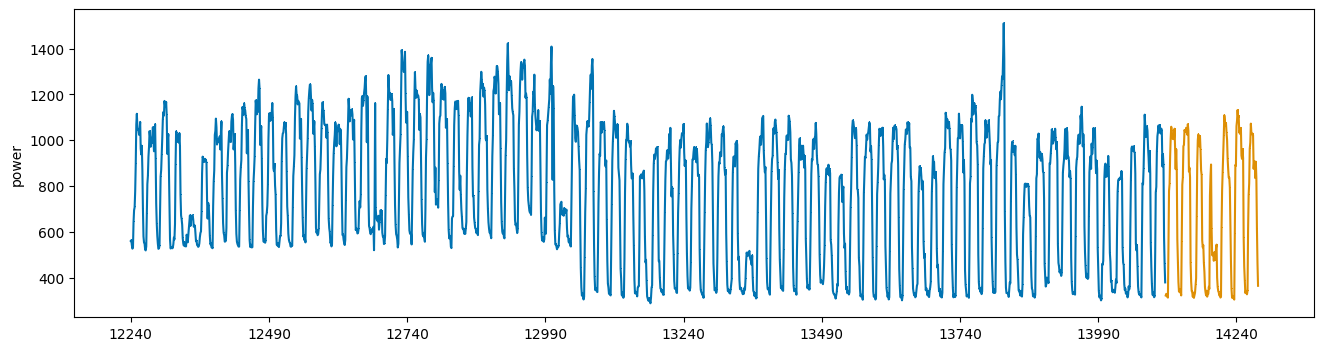

In [ ]:
## 7번 건물의 발전량
y = train.loc[train.num == 7, 'power']
x = train.loc[train.num == 7, ].iloc[:, 3:]

y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = y, X = x, test_size = 168) # 24시간*7일 = 168

print('train data shape\nx:{}, y:{}'.format(x_train.shape, y_train.shape))

plot_series(y_train, y_valid, markers=[',' , ','])
plt.show()

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 12240 to 14111
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp           1872 non-null   float64
 1   prec           1872 non-null   float64
 2   wind           1872 non-null   float64
 3   hum            1872 non-null   float64
 4   sun            1872 non-null   float64
 5   day            1872 non-null   int64  
 6   month          1872 non-null   int64  
 7   week           1872 non-null   int64  
 8   day_hour_mean  1872 non-null   float64
 9   hour_mean      1872 non-null   float64
 10  hour_std       1872 non-null   float64
 11  sin_time       1872 non-null   float64
 12  cos_time       1872 non-null   float64
 13  THI            1872 non-null   float64
 14  holiday        1872 non-null   int64  
 15  CDH            1872 non-null   float64
dtypes: float64(12), int64(4)
memory usage: 248.6 KB


In [ ]:
train = train.drop(columns ="sun")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num            204000 non-null  int64  
 1   date_time      204000 non-null  object 
 2   power          204000 non-null  float64
 3   temp           204000 non-null  float64
 4   prec           204000 non-null  float64
 5   wind           203981 non-null  float64
 6   hum            203991 non-null  float64
 7   day            204000 non-null  int64  
 8   month          204000 non-null  int64  
 9   week           204000 non-null  int64  
 10  day_hour_mean  204000 non-null  float64
 11  hour_mean      204000 non-null  float64
 12  hour_std       204000 non-null  float64
 13  sin_time       204000 non-null  float64
 14  cos_time       204000 non-null  float64
 15  THI            203991 non-null  float64
 16  holiday        204000 non-null  int64  
 17  CDH            204000 non-nul

In [5]:
# Define SMAPE loss function
def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) * 100

In [ ]:
print("실제값이 100일 때 50으로 underestimate할 때의 SMAPE : {}".format(SMAPE(100, 50)))
print("실제값이 100일 때 150으로 overestimate할 때의 SMAPE : {}".format(SMAPE(100, 150)))

NameError: ignored

In [6]:
def weighted_mse(alpha = 1):
    def weighted_mse_fixed(label, pred):
        residual = (label - pred).astype("float")
        grad = np.where(residual>0, -2*alpha*residual, -2*residual)
        hess = np.where(residual>0, 2*alpha, 2.0)
        return grad, hess
    return weighted_mse_fixed

In [ ]:

xgb_reg = XGBRegressor(n_estimators = 10000, seed=0)

xgb_reg.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)],
        early_stopping_rounds=300,
       verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [7]:
from sklearn.metrics import make_scorer
smape = make_scorer(SMAPE, greater_is_better = False)

In [ ]:
x_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 14112 to 14279
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp           168 non-null    float64
 1   prec           168 non-null    float64
 2   wind           168 non-null    float64
 3   hum            168 non-null    float64
 4   day            168 non-null    int64  
 5   month          168 non-null    int64  
 6   week           168 non-null    int64  
 7   day_hour_mean  168 non-null    float64
 8   hour_mean      168 non-null    float64
 9   hour_std       168 non-null    float64
 10  sin_time       168 non-null    float64
 11  cos_time       168 non-null    float64
 12  THI            168 non-null    float64
 13  holiday        168 non-null    int64  
 14  CDH            168 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 21.0 KB


best iterations: 15
SMAPE : 3.8106149773251357


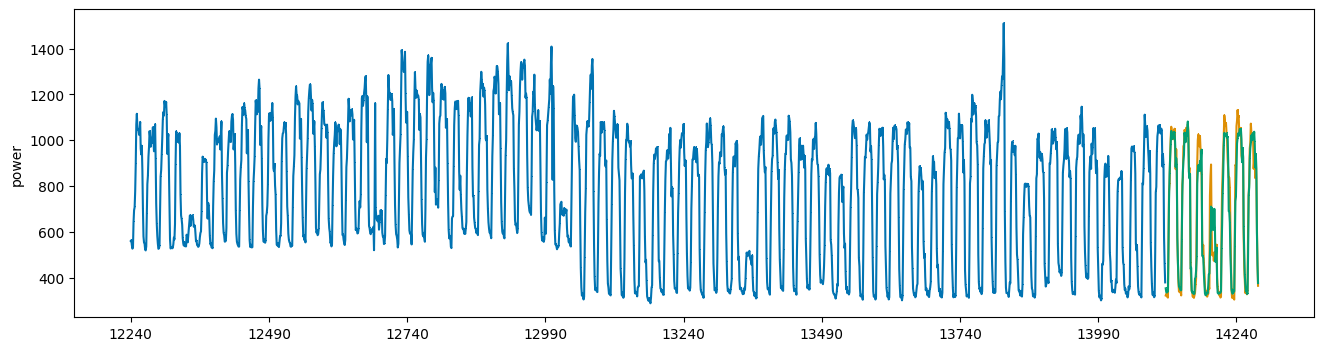

In [ ]:
## 주황색이 실제 전력소비량, 초록색이 예측값입니다.
pred = xgb_reg.predict(x_valid)
pred = pd.Series(pred)
pred.index = np.arange(y_valid.index[0], y_valid.index[-1]+1)
plot_series(y_train, y_valid, pd.Series(pred), markers=[',' , ',', ','])

print('best iterations: {}'.format(xgb_reg.best_iteration))
print('SMAPE : {}'.format(SMAPE(y_valid, pred)))

In [ ]:
x

,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,18.6,0.0,0.9,42.0,0.0,1085.28,2,6,22,1774.744615,446.882767,0,0.000000,1.000000,49.6576,-7.4
1,18.0,0.0,1.1,45.0,0.0,1047.36,2,6,22,1687.347692,439.662704,0,0.258819,0.965926,47.7625,-15.4
2,17.7,0.0,1.5,45.0,0.0,974.88,2,6,22,1571.483077,412.071906,0,0.500000,0.866025,47.2225,-23.7
3,16.7,0.0,1.4,48.0,0.0,953.76,2,6,22,1522.153846,391.205981,0,0.707107,0.707107,44.7856,-33.0
4,18.4,0.0,2.8,43.0,0.0,986.40,2,6,22,1506.793846,381.099697,0,0.866025,0.500000,49.0061,-40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,25.5,0.0,2.9,63.0,0.1,2517.12,2,8,34,2571.470769,377.509334,0,-0.965926,0.258819,60.1141,3.1
2036,25.0,0.0,2.6,66.0,0.0,2208.96,2,8,34,2391.027692,356.589629,0,-0.866025,0.500000,59.6464,4.3
2037,24.6,0.0,1.3,67.0,0.0,1806.24,2,8,34,1887.950769,216.680162,0,-0.707107,0.707107,59.1101,4.2
2038,24.1,0.0,2.1,70.0,0.0,1387.20,2,8,34,1412.861538,114.999557,0,-0.500000,0.866025,58.8800,2.3


In [ ]:
h_train =x[:-168]
h_valid =x[-168:]

In [ ]:
h_valid

,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
1872,24.1,0.0,2.1,78.0,0.0,1898.88,3,8,33,1627.800000,446.882767,0,0.000000,1.000000,61.5376,17.4
1873,23.4,0.0,2.2,82.0,0.0,1804.80,3,8,33,1550.080000,439.662704,0,0.258819,0.965926,62.0816,10.7
1874,23.1,0.0,2.0,84.0,0.0,1626.72,3,8,33,1431.120000,412.071906,0,0.500000,0.866025,62.5624,3.6
1875,23.2,0.0,1.9,84.0,0.0,1565.28,3,8,33,1372.200000,391.205981,0,0.707107,0.707107,62.7424,-1.6
1876,22.7,0.0,2.1,87.0,0.0,1584.48,3,8,33,1381.720000,381.099697,0,0.866025,0.500000,63.5221,-8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,25.5,0.0,2.9,63.0,0.1,2517.12,2,8,34,2571.470769,377.509334,0,-0.965926,0.258819,60.1141,3.1
2036,25.0,0.0,2.6,66.0,0.0,2208.96,2,8,34,2391.027692,356.589629,0,-0.866025,0.500000,59.6464,4.3
2037,24.6,0.0,1.3,67.0,0.0,1806.24,2,8,34,1887.950769,216.680162,0,-0.707107,0.707107,59.1101,4.2
2038,24.1,0.0,2.1,70.0,0.0,1387.20,2,8,34,1412.861538,114.999557,0,-0.500000,0.866025,58.8800,2.3


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import re
import optuna
from optuna.integration import XGBoostPruningCallback
sns.set_theme(style="darkgrid")

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/energe/train_process.csv")

In [ ]:
y = train["power"]
k = train.drop(columns=["power"])

In [ ]:
train

,Unnamed: 0,num,date_time,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,0,1,20220601 00,18.6,0.0,0.9,42.0,0.0,1085.28,2,6,22,1774.744615,446.882767,0,0.000000,1.000000,49.6576,-7.4
1,1,1,20220601 01,18.0,0.0,1.1,45.0,0.0,1047.36,2,6,22,1687.347692,439.662704,0,0.258819,0.965926,47.7625,-15.4
2,2,1,20220601 02,17.7,0.0,1.5,45.0,0.0,974.88,2,6,22,1571.483077,412.071906,0,0.500000,0.866025,47.2225,-23.7
3,3,1,20220601 03,16.7,0.0,1.4,48.0,0.0,953.76,2,6,22,1522.153846,391.205981,0,0.707107,0.707107,44.7856,-33.0
4,4,1,20220601 04,18.4,0.0,2.8,43.0,0.0,986.40,2,6,22,1506.793846,381.099697,0,0.866025,0.500000,49.0061,-40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,203995,100,20220824 19,23.1,0.0,0.9,86.0,0.5,881.04,2,8,34,964.873846,161.399578,0,-0.965926,0.258819,63.6624,-19.6
203996,203996,100,20220824 20,22.4,0.0,1.3,86.0,0.0,798.96,2,8,34,882.184615,137.566008,0,-0.866025,0.500000,62.4024,-20.2
203997,203997,100,20220824 21,21.3,0.0,1.0,92.0,0.0,825.12,2,8,34,779.095385,128.300189,0,-0.707107,0.707107,64.1976,-22.3
203998,203998,100,20220824 22,21.0,0.0,0.3,94.0,0.0,640.08,2,8,34,663.267692,112.464079,0,-0.500000,0.866025,65.0744,-25.1


train data shape
x:(1872, 14), y:(1872,)


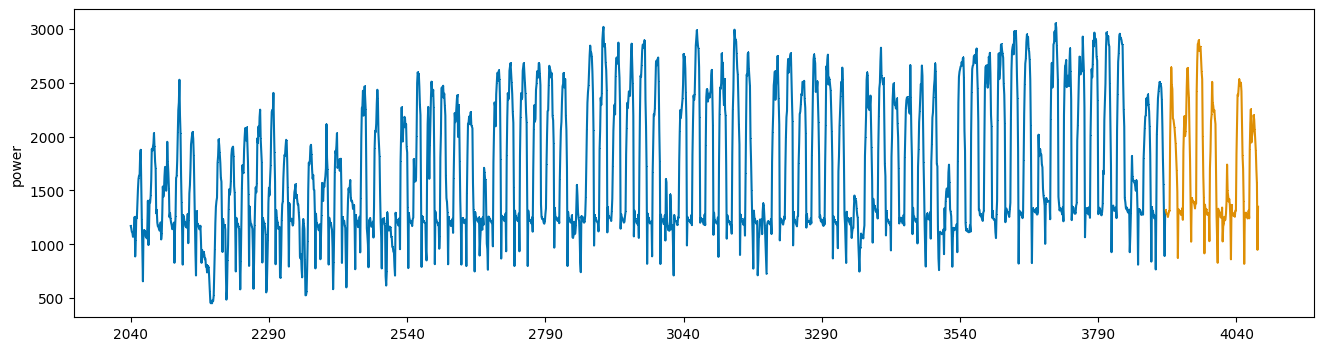

In [ ]:
## 7번 건물의 발전량
y = train.loc[train.num == 2, 'power']
x = k.loc[train.num == 2, ].iloc[:, 3:]

y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = y, X = x, test_size = 168) # 24시간*7일 = 168

print('train data shape\nx:{}, y:{}'.format(x_train.shape, y_train.shape))

plot_series(y_train, y_valid, markers=[',' , ','])
plt.show()

In [ ]:
xgb_reg = XGBRegressor(n_estimators = 300, seed=69,alpha=0,learning_rate = 0.3)

xgb_reg.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)],
        early_stopping_rounds=300,
       verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

best iterations: 19
SMAPE : 4.68328521551828


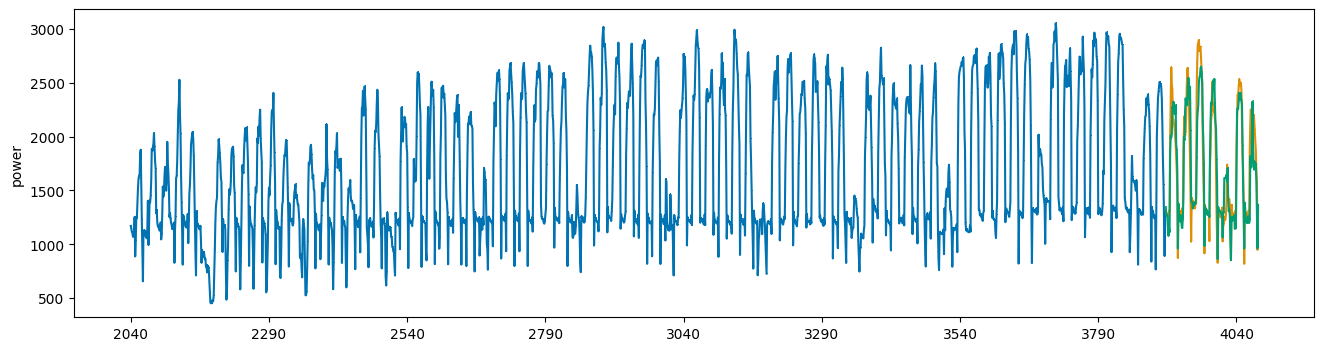

In [ ]:
## 주황색이 실제 전력소비량, 초록색이 예측값입니다.
pred = xgb_reg.predict(x_valid)
pred = pd.Series(pred)
pred.index = np.arange(y_valid.index[0], y_valid.index[-1]+1)
plot_series(y_train, y_valid, pd.Series(pred), markers=[',' , ',', ','])

print('best iterations: {}'.format(xgb_reg.best_iteration))
print('SMAPE : {}'.format(SMAPE(y_valid, pred)))

In [ ]:
test

,num,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,1,23.5,2.2,72,0.0,3,8,34,1627.800000,1706.318118,446.882767,0,0.000000,1.000000,58.3456,-2.5
1,1,23.0,0.9,72,0.0,3,8,34,1550.080000,1622.620235,439.662704,0,0.258819,0.965926,57.4456,-5.5
2,1,22.7,1.5,75,0.0,3,8,34,1431.120000,1506.971294,412.071906,0,0.500000,0.866025,57.8725,-8.8
3,1,22.1,1.3,78,0.0,3,8,34,1372.200000,1437.365647,391.205981,0,0.707107,0.707107,57.9376,-12.7
4,1,21.8,1.0,77,0.0,3,8,34,1381.720000,1447.321412,381.099697,0,0.866025,0.500000,56.9961,-16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,22.5,0.9,84,0.0,2,8,35,964.873846,1010.462118,161.399578,0,-0.965926,0.258819,61.4824,-34.5
16796,100,20.7,0.4,95,0.0,2,8,35,882.184615,928.125176,137.566008,0,-0.866025,0.500000,65.2725,-34.4
16797,100,20.2,0.4,98,0.0,2,8,35,779.095385,830.032941,128.300189,0,-0.707107,0.707107,66.7056,-35.3
16798,100,20.1,1.1,97,0.0,2,8,35,663.267692,723.100235,112.464079,0,-0.500000,0.866025,65.7281,-36.8


In [ ]:
k

,Unnamed: 0,num,date_time,temp,prec,wind,hum,sun,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,0,1,20220601 00,18.6,0.0,0.9,42.0,0.0,2,6,22,1774.744615,446.882767,0,0.000000,1.000000,49.6576,-7.4
1,1,1,20220601 01,18.0,0.0,1.1,45.0,0.0,2,6,22,1687.347692,439.662704,0,0.258819,0.965926,47.7625,-15.4
2,2,1,20220601 02,17.7,0.0,1.5,45.0,0.0,2,6,22,1571.483077,412.071906,0,0.500000,0.866025,47.2225,-23.7
3,3,1,20220601 03,16.7,0.0,1.4,48.0,0.0,2,6,22,1522.153846,391.205981,0,0.707107,0.707107,44.7856,-33.0
4,4,1,20220601 04,18.4,0.0,2.8,43.0,0.0,2,6,22,1506.793846,381.099697,0,0.866025,0.500000,49.0061,-40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,203995,100,20220824 19,23.1,0.0,0.9,86.0,0.5,2,8,34,964.873846,161.399578,0,-0.965926,0.258819,63.6624,-19.6
203996,203996,100,20220824 20,22.4,0.0,1.3,86.0,0.0,2,8,34,882.184615,137.566008,0,-0.866025,0.500000,62.4024,-20.2
203997,203997,100,20220824 21,21.3,0.0,1.0,92.0,0.0,2,8,34,779.095385,128.300189,0,-0.707107,0.707107,64.1976,-22.3
203998,203998,100,20220824 22,21.0,0.0,0.3,94.0,0.0,2,8,34,663.267692,112.464079,0,-0.500000,0.866025,65.0744,-25.1


In [ ]:
y = train.loc[train.num == 1, 'power']


In [ ]:
x = k.loc[train.num == 1, ].iloc[:, 3:]


In [ ]:
test

,num,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,1,23.5,2.2,72,0.0,3,8,34,1627.800000,1706.318118,446.882767,0,0.000000,1.000000,58.3456,-2.5
1,1,23.0,0.9,72,0.0,3,8,34,1550.080000,1622.620235,439.662704,0,0.258819,0.965926,57.4456,-5.5
2,1,22.7,1.5,75,0.0,3,8,34,1431.120000,1506.971294,412.071906,0,0.500000,0.866025,57.8725,-8.8
3,1,22.1,1.3,78,0.0,3,8,34,1372.200000,1437.365647,391.205981,0,0.707107,0.707107,57.9376,-12.7
4,1,21.8,1.0,77,0.0,3,8,34,1381.720000,1447.321412,381.099697,0,0.866025,0.500000,56.9961,-16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,22.5,0.9,84,0.0,2,8,35,964.873846,1010.462118,161.399578,0,-0.965926,0.258819,61.4824,-34.5
16796,100,20.7,0.4,95,0.0,2,8,35,882.184615,928.125176,137.566008,0,-0.866025,0.500000,65.2725,-34.4
16797,100,20.2,0.4,98,0.0,2,8,35,779.095385,830.032941,128.300189,0,-0.707107,0.707107,66.7056,-35.3
16798,100,20.1,1.1,97,0.0,2,8,35,663.267692,723.100235,112.464079,0,-0.500000,0.866025,65.7281,-36.8


In [ ]:
test_x = test.loc[test.num == 1,].iloc[:,1:]

In [ ]:
test = test[['num','temp', 'prec', 'wind', 'hum', 'day', 'month', 'week', 'day_hour_mean', 'hour_std', 'holiday', 'sin_time', 'cos_time', 'THI', 'CDH']]

In [ ]:
k = k.drop(columns = "sun")

In [ ]:
test_x

,temp,prec,wind,hum,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,23.5,0.0,2.2,72,3,8,34,1627.800000,446.882767,0,0.000000,1.000000,58.3456,-2.5
1,23.0,0.0,0.9,72,3,8,34,1550.080000,439.662704,0,0.258819,0.965926,57.4456,-5.5
2,22.7,0.0,1.5,75,3,8,34,1431.120000,412.071906,0,0.500000,0.866025,57.8725,-8.8
3,22.1,0.0,1.3,78,3,8,34,1372.200000,391.205981,0,0.707107,0.707107,57.9376,-12.7
4,21.8,0.0,1.0,77,3,8,34,1381.720000,381.099697,0,0.866025,0.500000,56.9961,-16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,23.5,0.0,2.0,75,2,8,35,2571.470769,377.509334,0,-0.965926,0.258819,59.3125,-36.5
164,22.4,0.0,2.0,80,2,8,35,2391.027692,356.589629,0,-0.866025,0.500000,59.3400,-34.0
165,21.7,0.0,1.6,81,2,8,35,1887.950769,216.680162,0,-0.707107,0.707107,58.5409,-32.6
166,21.1,0.0,1.0,83,2,8,35,1412.861538,114.999557,0,-0.500000,0.866025,58.4421,-33.0


In [ ]:
k

,Unnamed: 0,num,date_time,temp,prec,wind,hum,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,0,1,20220601 00,18.6,0.0,0.9,42.0,2,6,22,1774.744615,446.882767,0,0.000000,1.000000,49.6576,-7.4
1,1,1,20220601 01,18.0,0.0,1.1,45.0,2,6,22,1687.347692,439.662704,0,0.258819,0.965926,47.7625,-15.4
2,2,1,20220601 02,17.7,0.0,1.5,45.0,2,6,22,1571.483077,412.071906,0,0.500000,0.866025,47.2225,-23.7
3,3,1,20220601 03,16.7,0.0,1.4,48.0,2,6,22,1522.153846,391.205981,0,0.707107,0.707107,44.7856,-33.0
4,4,1,20220601 04,18.4,0.0,2.8,43.0,2,6,22,1506.793846,381.099697,0,0.866025,0.500000,49.0061,-40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,203995,100,20220824 19,23.1,0.0,0.9,86.0,2,8,34,964.873846,161.399578,0,-0.965926,0.258819,63.6624,-19.6
203996,203996,100,20220824 20,22.4,0.0,1.3,86.0,2,8,34,882.184615,137.566008,0,-0.866025,0.500000,62.4024,-20.2
203997,203997,100,20220824 21,21.3,0.0,1.0,92.0,2,8,34,779.095385,128.300189,0,-0.707107,0.707107,64.1976,-22.3
203998,203998,100,20220824 22,21.0,0.0,0.3,94.0,2,8,34,663.267692,112.464079,0,-0.500000,0.866025,65.0744,-25.1


In [ ]:
test_x.columns

Index(['temp', 'wind', 'hum', 'prec', 'day', 'month', 'week', 'day_hour_mean',
       'hour_mean', 'hour_std', 'holiday', 'sin_time', 'cos_time', 'THI',
       'CDH'],
      dtype='object')

In [ ]:
k.columns

Index(['Unnamed: 0', 'num', 'date_time', 'temp', 'prec', 'wind', 'hum', 'day',
       'month', 'week', 'day_hour_mean', 'hour_std', 'holiday', 'sin_time',
       'cos_time', 'THI', 'CDH'],
      dtype='object')

In [ ]:
ㅅㄷㄴㅅ

Series([], Name: power, dtype: float64)

In [ ]:
y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = y, X = x, test_size = 168) # 24시간*7일 = 168


ValueError: ignored

In [134]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00


In [135]:
import optuna


In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) * 100

In [142]:
test = pd.read_csv("/content/drive/MyDrive/energe/real_test_2.csv")

In [143]:
test

,num,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
0,1,23.5,2.2,72,0.0,3,8,34,1627.800000,1706.318118,446.882767,0.000000,1.000000,58.3456,0,-2.5
1,1,23.0,0.9,72,0.0,3,8,34,1550.080000,1622.620235,439.662704,0.258819,0.965926,57.4456,0,-5.5
2,1,22.7,1.5,75,0.0,3,8,34,1431.120000,1506.971294,412.071906,0.500000,0.866025,57.8725,0,-8.8
3,1,22.1,1.3,78,0.0,3,8,34,1372.200000,1437.365647,391.205981,0.707107,0.707107,57.9376,0,-12.7
4,1,21.8,1.0,77,0.0,3,8,34,1381.720000,1447.321412,381.099697,0.866025,0.500000,56.9961,0,-16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,22.5,0.9,84,0.0,2,8,35,964.873846,1010.462118,161.399578,-0.965926,0.258819,61.4824,0,-34.5
16796,100,20.7,0.4,95,0.0,2,8,35,882.184615,928.125176,137.566008,-0.866025,0.500000,65.2725,0,-34.4
16797,100,20.2,0.4,98,0.0,2,8,35,779.095385,830.032941,128.300189,-0.707107,0.707107,66.7056,0,-35.3
16798,100,20.1,1.1,97,0.0,2,8,35,663.267692,723.100235,112.464079,-0.500000,0.866025,65.7281,0,-36.8


In [145]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
201960,0.181481,0.022556,0.655172,0.0,0.333333,0.0,0.0,0.005262,0.006775,0.010832,0.500000,1.000000,0.146426,0.0,0.585783,0.000000
201961,0.151852,0.007519,0.712644,0.0,0.333333,0.0,0.0,0.003589,0.004508,0.008443,0.629410,0.982963,0.147719,0.0,0.541868,0.043478
201962,0.125926,0.007519,0.735632,0.0,0.333333,0.0,0.0,0.002832,0.003410,0.007881,0.750000,0.933013,0.138505,0.0,0.495348,0.086957
201963,0.122222,0.015038,0.781609,0.0,0.333333,0.0,0.0,0.002491,0.002971,0.007487,0.853553,0.853553,0.166069,0.0,0.448456,0.130435
201964,0.137037,0.015038,0.758621,0.0,0.333333,0.0,0.0,0.002434,0.002807,0.007057,0.933013,0.750000,0.162822,0.0,0.403052,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,0.481481,0.067669,0.839080,0.0,0.333333,1.0,1.0,0.029129,0.034035,0.037335,0.017037,0.629410,0.524024,0.0,0.553777,0.826087
203996,0.455556,0.097744,0.839080,0.0,0.333333,1.0,1.0,0.025472,0.030023,0.031248,0.066987,0.750000,0.501542,0.0,0.551544,0.869565
203997,0.414815,0.075188,0.908046,0.0,0.333333,1.0,1.0,0.020911,0.025244,0.028882,0.146447,0.853553,0.533573,0.0,0.543729,0.913043
203998,0.403704,0.022556,0.931034,0.0,0.333333,1.0,1.0,0.015788,0.020034,0.024838,0.250000,0.933013,0.549218,0.0,0.533309,0.956522


In [149]:
test.head()

,num,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
0,1,23.5,2.2,72,0.0,3,8,34,1627.80,1706.318118,446.882767,0.000000,1.000000,58.3456,0,-2.5
1,1,23.0,0.9,72,0.0,3,8,34,1550.08,1622.620235,439.662704,0.258819,0.965926,57.4456,0,-5.5
2,1,22.7,1.5,75,0.0,3,8,34,1431.12,1506.971294,412.071906,0.500000,0.866025,57.8725,0,-8.8
3,1,22.1,1.3,78,0.0,3,8,34,1372.20,1437.365647,391.205981,0.707107,0.707107,57.9376,0,-12.7
4,1,21.8,1.0,77,0.0,3,8,34,1381.72,1447.321412,381.099697,0.866025,0.500000,56.9961,0,-16.9


In [164]:
preds = np.array([])
from optuna.samplers import TPESampler

sampler = TPESampler(seed=10)
def objective(trial):
    param = {
        'objective': 'regression', # 회귀
        'learning_rate': trial.suggest_loguniform("learning_rate", 0.007, 0.3),
        'n_estimators': trial.suggest_int('n_estimators',  100,10000 ),
        "alpha": trial.suggest_int("alpha",0,100),
        'min_child_weight' : trial.suggest_int("min_child_weight",3, 20),
        'max_depth' : trial.suggest_int("max_depth",4,12)
    }
    xgb_reg = XGBRegressor(**param,random_state=42)
    xgb_reg.set_params(**{'objective':weighted_mse(100)})
    xgb_reg.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)],
    early_stopping_rounds=300,
    verbose=False)
    smape = SMAPE(y_valid, xgb_reg.predict(x_valid))
    return smape


for i in range(1,101,1):
  y = train.loc[train.num == i, 'power']
  x = train.loc[train.num == i, ].iloc[:, 3:]
  y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = y, X = x, test_size = 168) # 24시간*7일 = 168
  test_x = test.loc[test.num == i,].iloc[:,1:]
  study_xgb = optuna.create_study(direction='minimize', sampler=sampler)
  study_xgb.optimize(objective, n_trials=15)
  trial = study_xgb.best_trial
  trial_params = trial.params

  final_xgb_model = XGBRegressor(**trial_params,random_state=42)
  final_xgb_model.set_params(**{'objective':weighted_mse(100)})
  final_xgb_model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)],
        early_stopping_rounds=300,
       verbose=False)
  pred = final_xgb_model.predict(test_x)
  preds = np.append(preds, pred)

submission = pd.read_csv('/sample_submission.csv')
submission['answer'] = preds
submission.to_csv('/content/drive/MyDrive/energe/energy_sub_2.csv', index = False)


[I 2023-07-25 07:29:19,813] A new study created in memory with name: no-name-63a7e8cc-6901-4056-883f-68e40e56604f
<ipython-input-164-eeeb01ce2fbf>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.007, 0.3),
[I 2023-07-25 07:29:21,432] Trial 0 finished with value: 2.6458495019269694 and parameters: {'learning_rate': 0.12703144427791974, 'n_estimators': 305, 'alpha': 63, 'min_child_weight': 16, 'max_depth': 8}. Best is trial 0 with value: 2.6458495019269694.
[I 2023-07-25 07:29:23,013] Trial 1 finished with value: 3.3462896340985573 and parameters: {'learning_rate': 0.016291886810052173, 'n_estimators': 2061, 'alpha': 76, 'min_child_weight': 6, 'max_depth': 4}. Best is trial 0 with value: 2.6458495019269694.
[I 2023-07-25 07:29:27,783] Trial 2 finished with value: 2.927

# 새 섹션

In [ ]:
preds.shape

(672,)

In [ ]:
33def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse


best iterations: 1247
SMAPE : 1.7250930582560866


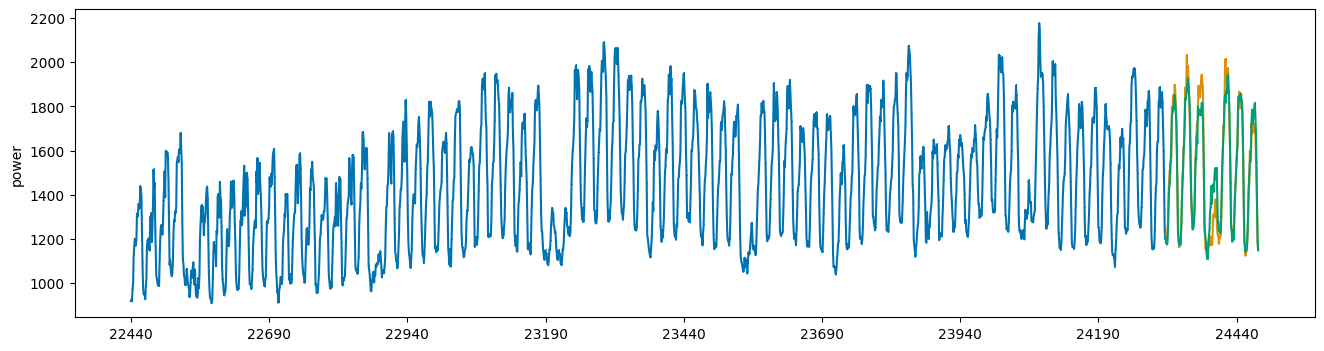

In [ ]:
## SMAPE 값으로도, 그래프 상으로도 과소추정이 모델이 개선되었음을 확인
pred = xgb_reg.predict(x_valid)
pred = pd.Series(pred)
pred.index = np.arange(y_valid.index[0], y_valid.index[-1]+1)
plot_series(y_train, y_valid, pd.Series(pred), markers=[',' , ',', ','])

print('best iterations: {}'.format(xgb_reg.best_iteration))
print('SMAPE : {}'.format(SMAPE(y_valid, pred)))

In [ ]:
h_train_X = x[:-168]
h_valid_X = x[-168:]
h_train_y = y[:-168]
h_valid_y = y[-168:]

print(h_train_X.shape, h_train_y.shape, h_valid_X.shape, h_valid_y.shape)

(203832, 18) (203832,) (168, 18) (168,)


In [ ]:
train_df = train_df.drop(columns=["일사(MJ/m2)"])

In [ ]:
train_df

,num,date_time,temp,prec,wind,hum,sun,power
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40
...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,881.04
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,798.96
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,825.12
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,640.08


In [ ]:
cols = ['num', 'date_time',  'temp','prec', 'wind',"hum",'sun','power']
train_df.columns = cols


In [ ]:
test

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1,20220825 00,23.5,0.0,2.2,72
1,1,20220825 01,23.0,0.0,0.9,72
2,1,20220825 02,22.7,0.0,1.5,75
3,1,20220825 03,22.1,0.0,1.3,78
4,1,20220825 04,21.8,0.0,1.0,77
...,...,...,...,...,...,...
16795,100,20220831 19,22.5,0.0,0.9,84
16796,100,20220831 20,20.7,0.0,0.4,95
16797,100,20220831 21,20.2,0.0,0.4,98
16798,100,20220831 22,20.1,0.0,1.1,97


In [ ]:
train_df

,num,date_time,temp,prec,wind,hum,sun,power,hour,day,month,week
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,0,2,6,22
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,1,2,6,22
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,2,2,6,22
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,3,2,6,22
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,4,2,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,881.04,19,2,8,34
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,798.96,20,2,8,34
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,825.12,21,2,8,34
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,640.08,22,2,8,34


In [ ]:
# 시간 관련 변수들 생성
date = pd.to_datetime(train_df.date_time)
train_df['hour'] = date.dt.hour
train_df['day'] = date.dt.weekday
train_df['month'] = date.dt.month
train_df['week'] = date.dt.weekofyear

<ipython-input-114-043a15a75e0e>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_df['week'] = date.dt.weekofyear


In [ ]:
train_df["power_hour_mean"] = train["power_hour_mean"]
train_df["power_hour_std"] = train["power_hour_std"]

KeyError: ignored

In [ ]:
test

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1,20220825 00,23.5,0.0,2.2,72
1,1,20220825 01,23.0,0.0,0.9,72
2,1,20220825 02,22.7,0.0,1.5,75
3,1,20220825 03,22.1,0.0,1.3,78
4,1,20220825 04,21.8,0.0,1.0,77
...,...,...,...,...,...,...
16795,100,20220831 19,22.5,0.0,0.9,84
16796,100,20220831 20,20.7,0.0,0.4,95
16797,100,20220831 21,20.2,0.0,0.4,98
16798,100,20220831 22,20.1,0.0,1.1,97


In [ ]:
test = pd.read_csv('/content/test.csv')
test = test.drop(columns = 'num_date_time')
# train set과 동일한 전처리 과정
cols = ['num', 'date_time', 'temp','prec', 'wind','hum']
test.columns = cols
date = pd.to_datetime(test.date_time)
test['hour'] = date.dt.hour
test['day'] = date.dt.weekday
test['month'] = date.dt.month
test['week'] = date.dt.weekofyear
test['sin_time'] = np.sin(2*np.pi*test.hour/24)
test['cos_time'] = np.cos(2*np.pi*test.hour/24)
test['holiday'] = test.apply(lambda x : 0 if x['day']<5 else 1, axis = 1)
test.loc[('20220829'<=test.date_time)&(test.date_time<'20220830'), 'holiday'] = 1

power_mean = pd.pivot_table(train_df, values = 'power', index = ['num', 'hour', 'day'], aggfunc = np.mean).reset_index()
power_hour_mean = pd.pivot_table(train_df, values = 'power', index = ['num', 'hour'], aggfunc = np.mean).reset_index()
power_hour_std = pd.pivot_table(train_df, values = 'power', index = ['num', 'hour'], aggfunc = np.std).reset_index()
## 건물별 일별 시간별 발전량 평균
tqdm.pandas()
test['day_hour_mean'] = test.progress_apply(lambda x : power_mean.loc[(power_mean.num == x['num']) & (power_mean.day == x['day']) & (power_mean.hour == x['hour']) ,'power'].values[0], axis = 1)

## 건물별 시간별 발전량 평균 넣어주기
tqdm.pandas()
test['hour_mean'] = test.progress_apply(lambda x : power_hour_mean.loc[(power_hour_mean.num == x['num']) & (power_hour_mean.hour == x['hour']) ,'power'].values[0], axis = 1)

tqdm.pandas()
test['hour_std'] = test.progress_apply(lambda x : power_hour_std.loc[(power_hour_std.num == x['num']) & (power_hour_std.hour == x['hour']) ,'power'].values[0], axis = 1)

test.drop(['hour','date_time'], axis = 1, inplace = True)

# pandas 내 선형보간 method 사용
for i in range(60):
    test.iloc[i*168:(i+1)*168, :]  = test.iloc[i*168:(i+1)*168, :].interpolate()


test['THI'] = 9/5*test['temp'] - 0.55*(1-test['hum']/100)*(9/5*test['hum']-26)+32
def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

cdhs = np.array([])
for num in range(1,101,1):
    temp = test[test['num'] == num]
    cdh = CDH(temp['temp'].values)
    cdhs = np.concatenate([cdhs, cdh])
test['CDH'] = cdhs


<ipython-input-127-8135903263b4>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test['week'] = date.dt.weekofyear
100%|██████████| 16800/16800 [00:07<00:00, 2280.72it/s]


In [ ]:
test

,num,temp,prec,wind,hum,day,month,week,sin_time,cos_time,holiday,day_hour_mean,hour_mean,hour_std,THI,CDH
0,1,23.5,0.0,2.2,72,3,8,34,0.000000,1.000000,0,1627.800000,1706.318118,446.882767,58.3456,-2.5
1,1,23.0,0.0,0.9,72,3,8,34,0.258819,0.965926,0,1550.080000,1622.620235,439.662704,57.4456,-5.5
2,1,22.7,0.0,1.5,75,3,8,34,0.500000,0.866025,0,1431.120000,1506.971294,412.071906,57.8725,-8.8
3,1,22.1,0.0,1.3,78,3,8,34,0.707107,0.707107,0,1372.200000,1437.365647,391.205981,57.9376,-12.7
4,1,21.8,0.0,1.0,77,3,8,34,0.866025,0.500000,0,1381.720000,1447.321412,381.099697,56.9961,-16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,22.5,0.0,0.9,84,2,8,35,-0.965926,0.258819,0,964.873846,1010.462118,161.399578,61.4824,-34.5
16796,100,20.7,0.0,0.4,95,2,8,35,-0.866025,0.500000,0,882.184615,928.125176,137.566008,65.2725,-34.4
16797,100,20.2,0.0,0.4,98,2,8,35,-0.707107,0.707107,0,779.095385,830.032941,128.300189,66.7056,-35.3
16798,100,20.1,0.0,1.1,97,2,8,35,-0.500000,0.866025,0,663.267692,723.100235,112.464079,65.7281,-36.8


In [ ]:

test = test[['num','temp', 'wind', 'hum', 'prec', 'day', 'month', 'week',
       'day_hour_mean', 'hour_mean', 'hour_std', 'holiday', 'sin_time',
       'cos_time', 'THI', 'CDH']]
test.head()

,num,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,1,23.5,2.2,72,0.0,3,8,34,1627.80,1706.318118,446.882767,0,0.000000,1.000000,58.3456,-2.5
1,1,23.0,0.9,72,0.0,3,8,34,1550.08,1622.620235,439.662704,0,0.258819,0.965926,57.4456,-5.5
2,1,22.7,1.5,75,0.0,3,8,34,1431.12,1506.971294,412.071906,0,0.500000,0.866025,57.8725,-8.8
3,1,22.1,1.3,78,0.0,3,8,34,1372.20,1437.365647,391.205981,0,0.707107,0.707107,57.9376,-12.7
4,1,21.8,1.0,77,0.0,3,8,34,1381.72,1447.321412,381.099697,0,0.866025,0.500000,56.9961,-16.9


In [ ]:
test.to_csv("/content/drive/MyDrive/energe/test_process.csv")

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num            16800 non-null  int64  
 1   temp           16800 non-null  float64
 2   wind           16800 non-null  float64
 3   hum            16800 non-null  int64  
 4   prec           16800 non-null  float64
 5   day            16800 non-null  int64  
 6   month          16800 non-null  int64  
 7   week           16800 non-null  int64  
 8   day_hour_mean  16800 non-null  float64
 9   hour_mean      16800 non-null  float64
 10  hour_std       16800 non-null  float64
 11  holiday        16800 non-null  int64  
 12  sin_time       16800 non-null  float64
 13  cos_time       16800 non-null  float64
 14  THI            16800 non-null  float64
 15  CDH            16800 non-null  float64
dtypes: float64(10), int64(6)
memory usage: 2.1 MB


In [ ]:
train_x = pd.read_csv("/content/drive/MyDrive/energe/train_process.csv")

In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num            204000 non-null  int64  
 1   date_time      204000 non-null  object 
 2   temp           204000 non-null  float64
 3   prec           204000 non-null  float64
 4   wind           203981 non-null  float64
 5   hum            203991 non-null  float64
 6   power          204000 non-null  float64
 7   day            204000 non-null  int64  
 8   month          204000 non-null  int64  
 9   week           204000 non-null  int64  
 10  day_hour_mean  204000 non-null  float64
 11  hour_std       204000 non-null  float64
 12  holiday        204000 non-null  int64  
 13  sin_time       204000 non-null  float64
 14  cos_time       204000 non-null  float64
 15  THI            203991 non-null  float64
 16  CDH            204000 non-null  float64
dtypes: float64(11), int64(5), obj

In [ ]:
train_x = train_x.drop(columns =["Unnamed: 0.1","Unnamed: 0","sun"])

In [ ]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
df = pd.DataFrame(columns = ['n_estimators', 'eta',"alpha"])
preds = np.array([])

grid = {'n_estimators' : [10000], 'eta' : [0.01,0.001,0.1], 'alpha': [10,50,100]} # fix the n_estimators & eta(learning rate)

for i in tqdm(np.arange(1, 101,1)):
    y = train.loc[train.num == i, 'power']
    x = k.loc[k.num == i, ].iloc[:, 3:]
    y_train, y_test, x_train, x_test = temporal_train_test_split(y = y, X = x, test_size = 168)


    pds = PredefinedSplit(np.append(-np.ones(len(x)-168), np.zeros(168)))
    gcv = GridSearchCV(estimator = XGBRegressor(seed = 0, gpu_id = 0,
                                                tree_method = 'gpu_hist', predictor= 'gpu_predictor'),
                       param_grid = grid, scoring = smape, cv = pds, refit = True, verbose = True)


    gcv.fit(x, y)
    best = gcv.best_estimator_
    params = gcv.best_params_
    print(params)
    pred = best.predict(x_test)
    building = 'building'+str(i)
    print(building + '|| SMAPE : {}'.format(SMAPE(y_test, pred)))

    preds = np.append(preds, pred)
    df = pd.concat([df, pd.DataFrame(params, index = [0])], axis = 0)
    df.to_csv('/content/drive/MyDrive/energe/hyperparameter_xgb1.csv', index = False) # save the tuned parameters

  0%|          | 0/100 [00:00<?, ?it/s]

Fitting 1 folds for each of 9 candidates, totalling 9 fits


  1%|          | 1/100 [02:00<3:18:46, 120.47s/it]

{'alpha': 100, 'eta': 0.1, 'n_estimators': 10000}
building1|| SMAPE : 0.2189618164812259
Fitting 1 folds for each of 9 candidates, totalling 9 fits


  1%|          | 1/100 [02:41<4:26:41, 161.63s/it]


KeyboardInterrupt: ignored

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer

# Define the SMAPE function (update this function according to your implementation)
def smape(y_true, y_pred):
    # Your SMAPE calculation code here
    pass

# Assuming you have already defined train and k DataFrames

df = pd.DataFrame(columns=['n_estimators', 'eta', 'min_child_weight', 'max_depth', 'colsample_bytree', 'subsample'])
preds = np.array([])

grid = {
    'n_estimators': [100],
    'eta': [0.01],
    'min_child_weight': np.arange(1, 8, 1),
    'max_depth': np.arange(3, 9, 1),
    'colsample_bytree': np.arange(0.8, 1.0, 0.1),
    'subsample': np.arange(0.8, 1.0, 0.1)
}

for i in tqdm(np.arange(1, 101, 1)):
    y = train.loc[train.num == i, 'power']
    x = k.loc[k.num == i, ].iloc[:, 3:]

    # Create PredefinedSplit
    pds = PredefinedSplit(np.append(-np.ones(len(x) - 168), np.zeros(168)))
    XGBRegressor(tree_method='gpu_hist', gpu_id=0)
    # Set up GPU-accelerated XGBoostRegressor
    xgb_reg = XGBRegressor(
        seed=0,
        tree_method='gpu_hist',  # Use GPU acceleration for tree building
        predictor='gpu_predictor',  # Use GPU for prediction
        gpu_id=0  # Specify GPU device ID (0 in Colab)
    )

    # GridSearchCV
    gcv = GridSearchCV(
        estimator=xgb_reg,
        param_grid=grid,
        scoring=make_scorer(smape),  # Use SMAPE as the evaluation metric
        cv=pds,
        refit=True,
        verbose=True
    )

    gcv.fit(x, y)
    best = gcv.best_estimator_
    params = gcv.best_params_
    print(params)

    # Assuming you have defined x_test and y_test as the test set for evaluation
    pred = best.predict(x_test)
    building = 'building' + str(i)
    print(building + '|| SMAPE : {}'.format(smape(y_test, pred)))

    preds = np.append(preds, pred)
    df = pd.concat([df, pd.DataFrame(params, index=[0])], axis=0)
    df.to_csv('./hyperparameter_xgb.csv', index=False)  # save the tuned parameters


  1%|          | 1/100 [00:59<1:38:22, 59.62s/it]


KeyboardInterrupt: ignored

best iterations: 48
SMAPE : 0.2938988832587244


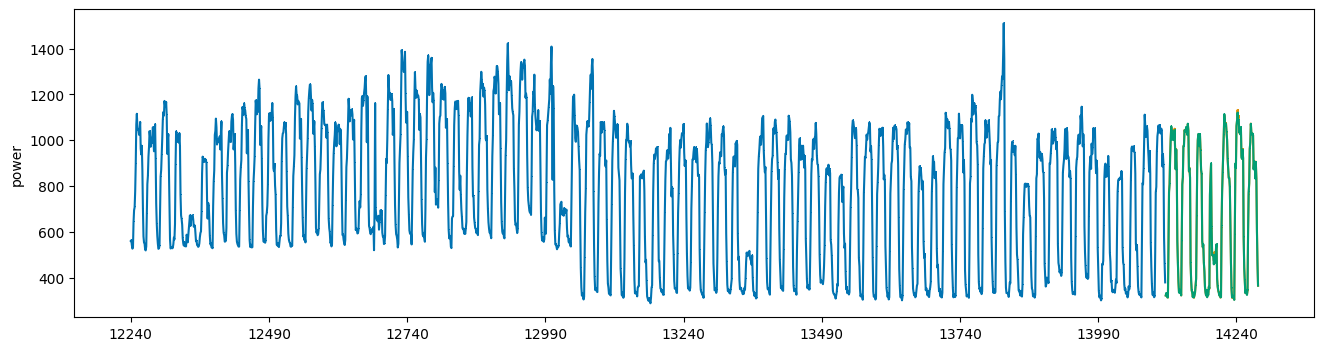

In [ ]:
pred = xgb_reg.predict(x_valid)
pred = pd.Series(pred)
pred.index = np.arange(y_valid.index[0], y_valid.index[-1]+1)
plot_series(y_train, y_valid, pd.Series(pred), markers=[',' , ',', ','])

print('best iterations: {}'.format(xgb_reg.best_iteration))
print('SMAPE : {}'.format(SMAPE(y_valid, pred)))

In [ ]:
x

,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,18.6,0.0,0.9,42.0,0.0,1085.28,2,6,22,1774.744615,446.882767,0,0.000000,1.000000,49.6576,-7.4
1,18.0,0.0,1.1,45.0,0.0,1047.36,2,6,22,1687.347692,439.662704,0,0.258819,0.965926,47.7625,-15.4
2,17.7,0.0,1.5,45.0,0.0,974.88,2,6,22,1571.483077,412.071906,0,0.500000,0.866025,47.2225,-23.7
3,16.7,0.0,1.4,48.0,0.0,953.76,2,6,22,1522.153846,391.205981,0,0.707107,0.707107,44.7856,-33.0
4,18.4,0.0,2.8,43.0,0.0,986.40,2,6,22,1506.793846,381.099697,0,0.866025,0.500000,49.0061,-40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,25.5,0.0,2.9,63.0,0.1,2517.12,2,8,34,2571.470769,377.509334,0,-0.965926,0.258819,60.1141,3.1
2036,25.0,0.0,2.6,66.0,0.0,2208.96,2,8,34,2391.027692,356.589629,0,-0.866025,0.500000,59.6464,4.3
2037,24.6,0.0,1.3,67.0,0.0,1806.24,2,8,34,1887.950769,216.680162,0,-0.707107,0.707107,59.1101,4.2
2038,24.1,0.0,2.1,70.0,0.0,1387.20,2,8,34,1412.861538,114.999557,0,-0.500000,0.866025,58.8800,2.3


In [ ]:
pd.read_csv("/content/drive/MyDrive/energe/train_process.csv")

,Unnamed: 0.1,Unnamed: 0,num,date_time,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,0,0,1,20220601 00,18.6,0.0,0.9,42.0,0.0,1085.28,2,6,22,1774.744615,446.882767,0,0.000000,1.000000,49.6576,-7.4
1,1,1,1,20220601 01,18.0,0.0,1.1,45.0,0.0,1047.36,2,6,22,1687.347692,439.662704,0,0.258819,0.965926,47.7625,-15.4
2,2,2,1,20220601 02,17.7,0.0,1.5,45.0,0.0,974.88,2,6,22,1571.483077,412.071906,0,0.500000,0.866025,47.2225,-23.7
3,3,3,1,20220601 03,16.7,0.0,1.4,48.0,0.0,953.76,2,6,22,1522.153846,391.205981,0,0.707107,0.707107,44.7856,-33.0
4,4,4,1,20220601 04,18.4,0.0,2.8,43.0,0.0,986.40,2,6,22,1506.793846,381.099697,0,0.866025,0.500000,49.0061,-40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,203995,203995,100,20220824 19,23.1,0.0,0.9,86.0,0.5,881.04,2,8,34,964.873846,161.399578,0,-0.965926,0.258819,63.6624,-19.6
203996,203996,203996,100,20220824 20,22.4,0.0,1.3,86.0,0.0,798.96,2,8,34,882.184615,137.566008,0,-0.866025,0.500000,62.4024,-20.2
203997,203997,203997,100,20220824 21,21.3,0.0,1.0,92.0,0.0,825.12,2,8,34,779.095385,128.300189,0,-0.707107,0.707107,64.1976,-22.3
203998,203998,203998,100,20220824 22,21.0,0.0,0.3,94.0,0.0,640.08,2,8,34,663.267692,112.464079,0,-0.500000,0.866025,65.0744,-25.1


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/energe/train_process.csv")

NameError: ignored

In [ ]:
train = train.drop(columns = "sun")

In [ ]:
train

In [ ]:
from sklearn.metrics import make_scorer
smape = make_scorer(SMAPE, greater_is_better = False)

NameError: ignored

In [ ]:
a.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'num', 'date_time', 'temp', 'prec',
       'wind', 'hum', 'sun', 'power', 'day', 'month', 'week', 'day_hour_mean',
       'hour_std', 'holiday', 'sin_time', 'cos_time', 'THI', 'CDH'],
      dtype='object')

In [ ]:
y

0       1085.28
1       1047.36
2        974.88
3        953.76
4        986.40
         ...   
2035    2517.12
2036    2208.96
2037    1806.24
2038    1387.20
2039    1925.28
Name: power, Length: 2040, dtype: float64

In [ ]:
train.columns

Index(['num', 'date_time', 'temp', 'prec', 'wind', 'hum', 'power', 'day',
       'month', 'week', 'day_hour_mean', 'hour_std', 'holiday', 'sin_time',
       'cos_time', 'THI', 'CDH'],
      dtype='object')

In [ ]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num            204000 non-null  int64  
 1   date_time      204000 non-null  object 
 2   temp           204000 non-null  float64
 3   prec           204000 non-null  float64
 4   wind           203981 non-null  float64
 5   hum            203991 non-null  float64
 6   day            204000 non-null  int64  
 7   month          204000 non-null  int64  
 8   week           204000 non-null  int64  
 9   day_hour_mean  204000 non-null  float64
 10  hour_std       204000 non-null  float64
 11  holiday        204000 non-null  int64  
 12  sin_time       204000 non-null  float64
 13  cos_time       204000 non-null  float64
 14  THI            203991 non-null  float64
 15  CDH            204000 non-null  float64
dtypes: float64(10), int64(5), object(1)
memory usage: 24.9+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num            16800 non-null  int64  
 1   temp           16800 non-null  float64
 2   wind           16800 non-null  float64
 3   hum            16800 non-null  int64  
 4   prec           16800 non-null  float64
 5   day            16800 non-null  int64  
 6   month          16800 non-null  int64  
 7   week           16800 non-null  int64  
 8   day_hour_mean  16800 non-null  float64
 9   hour_mean      16800 non-null  float64
 10  hour_std       16800 non-null  float64
 11  holiday        16800 non-null  int64  
 12  sin_time       16800 non-null  float64
 13  cos_time       16800 non-null  float64
 14  THI            16800 non-null  float64
 15  CDH            16800 non-null  float64
dtypes: float64(10), int64(6)
memory usage: 2.1 MB


In [ ]:
train.columns

Index(['num', 'date_time', 'power', 'temp', 'prec', 'wind', 'hum', 'day',
       'month', 'week', 'day_hour_mean', 'hour_mean', 'hour_std', 'sin_time',
       'cos_time', 'THI', 'holiday', 'CDH'],
      dtype='object')

In [ ]:
train = train.reindex(['num', 'date_time', 'power', 'temp',  'wind', 'hum','prec', 'day',
       'month', 'week', 'day_hour_mean', 'hour_mean', 'hour_std', 'sin_time',
       'cos_time', 'THI', 'holiday', 'CDH'], axis = 1)
train.to_csv("/content/drive/MyDrive/energe/real_train.csv")

In [ ]:
## gridsearchCV for best model : 대략 1시간 소요
from sklearn.model_selection import PredefinedSplit, GridSearchCV
df = pd.DataFrame(columns = ['n_estimators', 'eta', 'min_child_weight','max_depth', 'colsample_bytree', 'subsample'])
preds = np.array([])

grid = {'n_estimators' : [100], 'eta' : [0.01], 'min_child_weight' : np.arange(1, 8, 1),
        'max_depth' : np.arange(3,9,1) , 'colsample_bytree' :np.arange(0.8, 1.0, 0.1),
        'subsample' :np.arange(0.8, 1.0, 0.1)} # fix the n_estimators & eta(learning rate)

for i in tqdm(np.arange(1, 101)):
    y = train.loc[train.num == i, 'power']
    x = train.loc[train.num == i, ].iloc[:, 3:]
    y_train, y_test, x_train, x_test = temporal_train_test_split(y = y, X = x, test_size = 168)


    pds = PredefinedSplit(np.append(-np.ones(len(x)-168), np.zeros(168)))
    gcv = GridSearchCV(estimator = XGBRegressor(seed = 0, gpu_id = 0,
                                                tree_method = 'gpu_hist', predictor= 'gpu_predictor'),
                       param_grid = grid, scoring = smape, cv = pds, refit = True, verbose = True)


    gcv.fit(x, y)
    best = gcv.best_estimator_
    params = gcv.best_params_
    print(params)
    pred = best.predict(x_test)
    building = 'building'+str(i)
    print(building + '|| SMAPE : {}'.format(SMAPE(y_test, pred)))
    preds = np.append(preds, pred)
    df = pd.concat([df, pd.DataFrame(params, index = [0])], axis = 0)
    df.to_csv('/content/drive/MyDrive/energe/hyperxgb_real.csv', index = False) # save the tuned parameters

  0%|          | 0/100 [00:00<?, ?it/s]

Fitting 1 folds for each of 168 candidates, totalling 168 fits


  1%|          | 1/100 [00:33<54:57, 33.30s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 8, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.9}
building1|| SMAPE : 22.337487826272678
Fitting 1 folds for each of 168 candidates, totalling 168 fits


  2%|▏         | 2/100 [01:02<50:32, 30.95s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building2|| SMAPE : 21.5508956828509
Fitting 1 folds for each of 168 candidates, totalling 168 fits


  3%|▎         | 3/100 [01:33<49:51, 30.84s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building3|| SMAPE : 18.425275330556563
Fitting 1 folds for each of 168 candidates, totalling 168 fits


  4%|▍         | 4/100 [01:59<46:40, 29.17s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building4|| SMAPE : 21.725907865163997
Fitting 1 folds for each of 168 candidates, totalling 168 fits


  5%|▌         | 5/100 [02:31<47:41, 30.12s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building5|| SMAPE : 22.906611190561573
Fitting 1 folds for each of 168 candidates, totalling 168 fits


  6%|▌         | 6/100 [02:59<46:03, 29.40s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building6|| SMAPE : 23.247378162087706
Fitting 1 folds for each of 168 candidates, totalling 168 fits


  7%|▋         | 7/100 [03:29<45:46, 29.54s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
building7|| SMAPE : 20.903632395751277
Fitting 1 folds for each of 168 candidates, totalling 168 fits


  8%|▊         | 8/100 [03:55<43:21, 28.28s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8}
building8|| SMAPE : 22.447909420261738
Fitting 1 folds for each of 168 candidates, totalling 168 fits


  9%|▉         | 9/100 [04:25<43:44, 28.84s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
building9|| SMAPE : 22.498724259891606
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 10%|█         | 10/100 [04:52<42:45, 28.50s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
building10|| SMAPE : 19.921634970910883
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 11%|█         | 11/100 [05:18<40:48, 27.51s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
building11|| SMAPE : 21.64001494638169
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 12%|█▏        | 12/100 [05:47<41:01, 27.97s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building12|| SMAPE : 22.71562820954945
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 13%|█▎        | 13/100 [06:13<39:42, 27.39s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
building13|| SMAPE : 22.41778551825931
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 14%|█▍        | 14/100 [06:42<39:58, 27.88s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.9}
building14|| SMAPE : 20.256450301743968
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 15%|█▌        | 15/100 [07:08<38:34, 27.23s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building15|| SMAPE : 21.368065075308508
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 16%|█▌        | 16/100 [07:37<39:07, 27.94s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building16|| SMAPE : 21.486149225300068
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 17%|█▋        | 17/100 [08:07<39:23, 28.47s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building17|| SMAPE : 22.98553478275332
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 18%|█▊        | 18/100 [08:37<39:48, 29.12s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building18|| SMAPE : 23.483633890012324
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 19%|█▉        | 19/100 [09:07<39:22, 29.17s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building19|| SMAPE : 23.513771236656567
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 20%|██        | 20/100 [09:36<38:54, 29.18s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
building20|| SMAPE : 22.83858094935989
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 21%|██        | 21/100 [10:07<39:00, 29.63s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building21|| SMAPE : 22.510887681861398
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 22%|██▏       | 22/100 [10:33<37:17, 28.68s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building22|| SMAPE : 22.712968531964894
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 23%|██▎       | 23/100 [10:59<35:35, 27.73s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
building23|| SMAPE : 22.627692709430146
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 24%|██▍       | 24/100 [11:28<35:44, 28.21s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building24|| SMAPE : 22.193474597280925
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 25%|██▌       | 25/100 [11:56<35:06, 28.09s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building25|| SMAPE : 23.13158288582523
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 26%|██▌       | 26/100 [12:23<34:22, 27.87s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.8}
building26|| SMAPE : 22.34741856828916
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 27%|██▋       | 27/100 [12:50<33:34, 27.60s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}
building27|| SMAPE : 21.60387182682743
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 28%|██▊       | 28/100 [13:18<33:18, 27.76s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building28|| SMAPE : 20.50994689835996
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 29%|██▉       | 29/100 [13:46<32:55, 27.83s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}
building29|| SMAPE : 21.33183977680864
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 30%|███       | 30/100 [14:18<33:44, 28.92s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.9}
building30|| SMAPE : 22.03194523923531
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 31%|███       | 31/100 [14:45<32:34, 28.33s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
building31|| SMAPE : 20.640387013504377
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 32%|███▏      | 32/100 [15:07<30:07, 26.59s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building32|| SMAPE : 22.275881143955083
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 33%|███▎      | 33/100 [15:27<27:16, 24.43s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building33|| SMAPE : 22.498124164811934
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 34%|███▍      | 34/100 [15:49<26:07, 23.75s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building34|| SMAPE : 22.331359716847928
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 35%|███▌      | 35/100 [16:08<24:11, 22.33s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building35|| SMAPE : 22.501662446681987
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 36%|███▌      | 36/100 [16:27<22:58, 21.55s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building36|| SMAPE : 22.48245943354976
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 37%|███▋      | 37/100 [16:56<24:52, 23.69s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
building37|| SMAPE : 23.03819557941455
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 38%|███▊      | 38/100 [17:26<26:21, 25.50s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.9}
building38|| SMAPE : 22.602468906751458
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 39%|███▉      | 39/100 [17:57<27:42, 27.25s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.9}
building39|| SMAPE : 23.262204589835513
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 40%|████      | 40/100 [18:29<28:30, 28.50s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.8}
building40|| SMAPE : 22.66021488720162
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 41%|████      | 41/100 [18:58<28:14, 28.73s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.9}
building41|| SMAPE : 22.92114438482494
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 42%|████▏     | 42/100 [19:29<28:19, 29.31s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
building42|| SMAPE : 22.832012806226672
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 43%|████▎     | 43/100 [19:58<27:45, 29.22s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
building43|| SMAPE : 22.061735370315684
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 44%|████▍     | 44/100 [20:25<26:51, 28.78s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
building44|| SMAPE : 21.721675992001323
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 45%|████▌     | 45/100 [20:51<25:39, 27.99s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building45|| SMAPE : 22.9665996120234
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 46%|████▌     | 46/100 [21:19<25:07, 27.91s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.9}
building46|| SMAPE : 22.415063293120628
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 47%|████▋     | 47/100 [21:47<24:30, 27.75s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building47|| SMAPE : 21.20947538550392
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 48%|████▊     | 48/100 [22:16<24:33, 28.35s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
building48|| SMAPE : 22.786681657716613
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 49%|████▉     | 49/100 [22:43<23:43, 27.91s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building49|| SMAPE : 23.63974380816707
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 50%|█████     | 50/100 [23:10<23:06, 27.73s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building50|| SMAPE : 21.610577558527584
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 51%|█████     | 51/100 [23:37<22:26, 27.48s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}
building51|| SMAPE : 22.514268815694415
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 52%|█████▏    | 52/100 [24:06<22:11, 27.74s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8}
building52|| SMAPE : 23.09663554865796
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 53%|█████▎    | 53/100 [24:37<22:38, 28.90s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building53|| SMAPE : 20.14490765698319
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 54%|█████▍    | 54/100 [25:10<23:05, 30.13s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building54|| SMAPE : 23.80146548030956
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 55%|█████▌    | 55/100 [25:34<21:04, 28.10s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building55|| SMAPE : 22.589908606402393
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 56%|█████▌    | 56/100 [25:55<19:00, 25.93s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building56|| SMAPE : 22.28273644554687
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 57%|█████▋    | 57/100 [26:24<19:15, 26.88s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.9}
building57|| SMAPE : 22.4059386109951
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 58%|█████▊    | 58/100 [26:45<17:39, 25.22s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building58|| SMAPE : 22.723058133116705
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 59%|█████▉    | 59/100 [27:16<18:19, 26.81s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building59|| SMAPE : 21.599523123576482
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 60%|██████    | 60/100 [27:46<18:36, 27.91s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}
building60|| SMAPE : 21.781092109510254
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 61%|██████    | 61/100 [28:15<18:27, 28.39s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building61|| SMAPE : 21.865009532264665
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 62%|██████▏   | 62/100 [28:45<18:10, 28.70s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
building62|| SMAPE : 21.42095545310345
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 63%|██████▎   | 63/100 [29:18<18:31, 30.05s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
building63|| SMAPE : 21.119466029873816
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 64%|██████▍   | 64/100 [29:47<17:50, 29.73s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
building64|| SMAPE : 21.59477158852892
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 65%|██████▌   | 65/100 [30:18<17:32, 30.08s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.8}
building65|| SMAPE : 20.94302958831397
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 66%|██████▌   | 66/100 [30:47<16:56, 29.88s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.9}
building66|| SMAPE : 22.8470189528394
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 67%|██████▋   | 67/100 [31:16<16:17, 29.61s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8}
building67|| SMAPE : 20.18132228737453
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 68%|██████▊   | 68/100 [31:45<15:37, 29.31s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.8}
building68|| SMAPE : 21.176175455028552
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 69%|██████▉   | 69/100 [32:12<14:48, 28.68s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
building69|| SMAPE : 21.87942475676729
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 70%|███████   | 70/100 [32:43<14:40, 29.37s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
building70|| SMAPE : 22.9247922526269
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 71%|███████   | 71/100 [33:13<14:13, 29.44s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building71|| SMAPE : 22.74951266859556
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 72%|███████▏  | 72/100 [33:38<13:11, 28.28s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building72|| SMAPE : 23.02929336343301
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 73%|███████▎  | 73/100 [34:04<12:21, 27.45s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building73|| SMAPE : 22.208148387092645
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 74%|███████▍  | 74/100 [34:32<12:02, 27.78s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
building74|| SMAPE : 23.158856537296252
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 75%|███████▌  | 75/100 [35:01<11:39, 27.97s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building75|| SMAPE : 21.737346641105574
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 76%|███████▌  | 76/100 [35:28<11:04, 27.67s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building76|| SMAPE : 22.545739532571098
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 77%|███████▋  | 77/100 [35:56<10:40, 27.83s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}
building77|| SMAPE : 22.48707709797917
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 78%|███████▊  | 78/100 [36:28<10:42, 29.21s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building78|| SMAPE : 23.153180274971856
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 79%|███████▉  | 79/100 [36:56<10:05, 28.82s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
building79|| SMAPE : 22.643609711241343
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 80%|████████  | 80/100 [37:26<09:41, 29.08s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}
building80|| SMAPE : 23.120157632414497
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 81%|████████  | 81/100 [37:55<09:09, 28.94s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
building81|| SMAPE : 22.338695638780166
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 82%|████████▏ | 82/100 [38:26<08:55, 29.75s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
building82|| SMAPE : 21.977844473154086
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 83%|████████▎ | 83/100 [38:56<08:23, 29.59s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}
building83|| SMAPE : 22.773209510172247
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 84%|████████▍ | 84/100 [39:25<07:54, 29.69s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.9}
building84|| SMAPE : 22.20042899575468
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 85%|████████▌ | 85/100 [39:53<07:17, 29.18s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building85|| SMAPE : 23.182506056588885
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 86%|████████▌ | 86/100 [40:24<06:54, 29.58s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
building86|| SMAPE : 23.40217517331214
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 87%|████████▋ | 87/100 [40:54<06:28, 29.87s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building87|| SMAPE : 22.55374737416226
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 88%|████████▊ | 88/100 [41:25<06:01, 30.12s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building88|| SMAPE : 23.196594366199225
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 89%|████████▉ | 89/100 [41:56<05:33, 30.33s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.8}
building89|| SMAPE : 23.273768136124605
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 90%|█████████ | 90/100 [42:27<05:04, 30.42s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
building90|| SMAPE : 23.203403625537796
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 91%|█████████ | 91/100 [42:55<04:29, 29.93s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building91|| SMAPE : 23.278278637729446
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 92%|█████████▏| 92/100 [43:27<04:02, 30.34s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
building92|| SMAPE : 22.259160467267165
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 93%|█████████▎| 93/100 [43:54<03:25, 29.31s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building93|| SMAPE : 22.502848194413318
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 94%|█████████▍| 94/100 [44:23<02:55, 29.23s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 100, 'subsample': 0.9}
building94|| SMAPE : 23.05660636650455
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 95%|█████████▌| 95/100 [44:52<02:25, 29.16s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
building95|| SMAPE : 17.953459991976242
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 96%|█████████▌| 96/100 [45:19<01:54, 28.67s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}
building96|| SMAPE : 21.060494634940913
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 97%|█████████▋| 97/100 [45:50<01:28, 29.39s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building97|| SMAPE : 23.237096873935016
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 98%|█████████▊| 98/100 [46:20<00:58, 29.42s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building98|| SMAPE : 20.40399033656707
Fitting 1 folds for each of 168 candidates, totalling 168 fits


 99%|█████████▉| 99/100 [46:50<00:29, 29.55s/it]

{'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8}
building99|| SMAPE : 21.944865271763796
Fitting 1 folds for each of 168 candidates, totalling 168 fits


100%|██████████| 100/100 [47:20<00:00, 28.41s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}
building100|| SMAPE : 23.173597333683947


In [ ]:
xgb_params = pd.read_csv('/content/drive/MyDrive/energe/hyperxgb_real.csv')


In [ ]:
x

,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
201960,15.0,0.3,70.0,0.0,2,6,22,425.335385,450.982588,57.618897,0.000000,1.000000,42.5000,0,-11.0
201961,14.2,0.1,75.0,0.0,2,6,22,387.507692,404.450824,48.260651,0.258819,0.965926,42.5725,0,-22.8
201962,13.5,0.1,77.0,0.0,2,6,22,370.393846,381.910588,46.060484,0.500000,0.866025,42.0561,0,-35.3
201963,13.4,0.2,81.0,0.0,2,6,22,362.695385,372.900706,44.517603,0.707107,0.707107,43.6009,0,-47.9
201964,13.8,0.2,79.0,0.0,2,6,22,361.403077,369.554824,42.833213,0.866025,0.500000,43.4189,0,-60.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,23.1,0.9,86.0,0.0,2,8,34,964.873846,1010.462118,161.399578,-0.965926,0.258819,63.6624,0,-19.6
203996,22.4,1.3,86.0,0.0,2,8,34,882.184615,928.125176,137.566008,-0.866025,0.500000,62.4024,0,-20.2
203997,21.3,1.0,92.0,0.0,2,8,34,779.095385,830.032941,128.300189,-0.707107,0.707107,64.1976,0,-22.3
203998,21.0,0.3,94.0,0.0,2,8,34,663.267692,723.100235,112.464079,-0.500000,0.866025,65.0744,0,-25.1


In [ ]:
xgb_params.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   n_estimators      100 non-null    int64  
 1   eta               100 non-null    float64
 2   min_child_weight  100 non-null    int64  
 3   max_depth         100 non-null    int64  
 4   colsample_bytree  100 non-null    float64
 5   subsample         100 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 4.8 KB


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/energe/real_train")
train = train.drop(columns ="Unnamed: 0")

In [ ]:
train.to_csv("/content/drive/MyDrive/energe/train_process_1",index = False)

In [ ]:
train =pd.read_csv("/content/drive/MyDrive/energe/train_process_1")
train.head()

,num,date_time,power,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
0,1,20220601 00,1085.28,18.6,0.9,42.0,0.0,2,6,22,1774.744615,1706.318118,446.882767,0.000000,1.000000,49.6576,0,-7.4
1,1,20220601 01,1047.36,18.0,1.1,45.0,0.0,2,6,22,1687.347692,1622.620235,439.662704,0.258819,0.965926,47.7625,0,-15.4
2,1,20220601 02,974.88,17.7,1.5,45.0,0.0,2,6,22,1571.483077,1506.971294,412.071906,0.500000,0.866025,47.2225,0,-23.7
3,1,20220601 03,953.76,16.7,1.4,48.0,0.0,2,6,22,1522.153846,1437.365647,391.205981,0.707107,0.707107,44.7856,0,-33.0
4,1,20220601 04,986.40,18.4,2.8,43.0,0.0,2,6,22,1506.793846,1447.321412,381.099697,0.866025,0.500000,49.0061,0,-40.6


In [ ]:
test.to_csv("/content/drive/MyDrive/energe/test_process_1.csv",index=False)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/energe/test_process.csv")
test = test.drop(columns = "Unnamed: 0")

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/energe/test_process_1.csv")
test.head()

,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
0,23.5,2.2,72,0.0,3,8,34,1627.80,1706.318118,446.882767,0.000000,1.000000,58.3456,0,-2.5
1,23.0,0.9,72,0.0,3,8,34,1550.08,1622.620235,439.662704,0.258819,0.965926,57.4456,0,-5.5
2,22.7,1.5,75,0.0,3,8,34,1431.12,1506.971294,412.071906,0.500000,0.866025,57.8725,0,-8.8
3,22.1,1.3,78,0.0,3,8,34,1372.20,1437.365647,391.205981,0.707107,0.707107,57.9376,0,-12.7
4,21.8,1.0,77,0.0,3,8,34,1381.72,1447.321412,381.099697,0.866025,0.500000,56.9961,0,-16.9


In [ ]:
train.head()

,num,date_time,power,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
0,1,20220601 00,1085.28,18.6,0.9,42.0,0.0,2,6,22,1774.744615,1706.318118,446.882767,0.000000,1.000000,49.6576,0,-7.4
1,1,20220601 01,1047.36,18.0,1.1,45.0,0.0,2,6,22,1687.347692,1622.620235,439.662704,0.258819,0.965926,47.7625,0,-15.4
2,1,20220601 02,974.88,17.7,1.5,45.0,0.0,2,6,22,1571.483077,1506.971294,412.071906,0.500000,0.866025,47.2225,0,-23.7
3,1,20220601 03,953.76,16.7,1.4,48.0,0.0,2,6,22,1522.153846,1437.365647,391.205981,0.707107,0.707107,44.7856,0,-33.0
4,1,20220601 04,986.40,18.4,2.8,43.0,0.0,2,6,22,1506.793846,1447.321412,381.099697,0.866025,0.500000,49.0061,0,-40.6


In [ ]:
test =test.reindex([ 'temp', 'wind', 'hum', 'prec', 'day',
       'month', 'week', 'day_hour_mean', 'hour_mean', 'hour_std','sin_time',
       'cos_time', 'THI', 'holiday', 'CDH'],axis = 1)

In [ ]:
train = train.drop(columns = 'sun')

In [ ]:
y = train.loc[train.num == i+1, 'power']
x = train.loc[train.num == i+1, ].iloc[:, 3:]
y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = y, X = x, test_size = 168)


In [ ]:
scores = []   # smape 값을 저장할 list
best_it = []  # best interation을 저장할 list
for i in tqdm(range(100)):
    y = train.loc[train.num == i+1, 'power']
    x = train.loc[train.num == i+1, ].iloc[:, 3:]
    y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = y, X = x, test_size = 168)

    xgb_reg = XGBRegressor(n_estimators = 10000, eta = 0.01, min_child_weight = xgb_params.iloc[i, 2],
                           max_depth = xgb_params.iloc[i, 3], colsample_bytree = xgb_params.iloc[i, 4],
                           subsample = xgb_params.iloc[i, 5], seed=0)
    xgb_reg.set_params(**{'objective':weighted_mse(100)}) # alpha = 100으로 고정

    xgb_reg.fit(x_train, y_train, eval_set=[(x_train, y_train),
                                            (x_valid, y_valid)], early_stopping_rounds=300, verbose=False)
    y_pred = xgb_reg.predict(x_valid)
    pred = pd.Series(y_pred)

    sm = SMAPE(y_valid, y_pred)
    scores.append(sm)
    best_it.append(xgb_reg.best_iteration) ## 실제 best iteration은 이 값에 +1 해주어야 함.

100%|██████████| 100/100 [05:27<00:00,  3.28s/it]


In [ ]:
alpha_list = []
smape_list = []
for i in tqdm(range(100)):
    y = train.loc[train.num == i+1, 'power']
    x = train.loc[train.num == i+1, ].iloc[:, 3:]
    y_train, y_test, x_train, x_test = temporal_train_test_split(y = y, X = x, test_size = 168)
    xgb = XGBRegressor(seed = 0,
                      n_estimators = best_it[i], eta = 0.01, min_child_weight = xgb_params.iloc[i, 2],
                      max_depth = xgb_params.iloc[i, 3], colsample_bytree = xgb_params.iloc[i, 4], subsample = xgb_params.iloc[i, 5])

    xgb.fit(x_train, y_train)
    pred0 = xgb.predict(x_test)
    best_alpha = 0
    score0 = SMAPE(y_test,pred0)

    for j in [1, 3, 5, 7, 10, 25, 50, 75, 100]:
        xgb = XGBRegressor(seed = 0,
                      n_estimators = best_it[i], eta = 0.01, min_child_weight = xgb_params.iloc[i, 2],
                      max_depth = xgb_params.iloc[i, 3], colsample_bytree = xgb_params.iloc[i, 4], subsample = xgb_params.iloc[i, 5])
        xgb.set_params(**{'objective' : weighted_mse(j)})

        xgb.fit(x_train, y_train)
        pred1 = xgb.predict(x_test)
        score1 = SMAPE(y_test, pred1)
        if score1 < score0:
            best_alpha = j
            score0 = score1

    alpha_list.append(best_alpha)
    smape_list.append(score0)
    print("building {} || best score : {} || alpha : {}".format(i+1, score0, best_alpha))

  1%|          | 1/100 [00:21<35:50, 21.72s/it]

building 1 || best score : 2.597747675465754 || alpha : 25


  2%|▏         | 2/100 [00:30<23:06, 14.14s/it]

building 2 || best score : 4.837437781502317 || alpha : 50


  3%|▎         | 3/100 [00:34<15:32,  9.61s/it]

building 3 || best score : 4.851364233337327 || alpha : 50


  4%|▍         | 4/100 [00:45<16:03, 10.03s/it]

building 4 || best score : 1.816390401954176 || alpha : 1


  5%|▌         | 5/100 [01:00<18:55, 11.96s/it]

building 5 || best score : 2.644133414027952 || alpha : 50


  6%|▌         | 6/100 [01:15<20:12, 12.90s/it]

building 6 || best score : 1.8912704833734737 || alpha : 100


  7%|▋         | 7/100 [01:24<18:00, 11.61s/it]

building 7 || best score : 4.121874724318491 || alpha : 0


  8%|▊         | 8/100 [01:40<19:55, 13.00s/it]

building 8 || best score : 2.4804507679359435 || alpha : 0


  9%|▉         | 9/100 [01:55<20:37, 13.60s/it]

building 9 || best score : 1.5400615606758492 || alpha : 100


 10%|█         | 10/100 [02:00<16:41, 11.13s/it]

building 10 || best score : 3.336817372535844 || alpha : 1


 11%|█         | 11/100 [02:11<16:23, 11.05s/it]

building 11 || best score : 1.4640219357884554 || alpha : 100


 12%|█▏        | 12/100 [02:23<16:38, 11.34s/it]

building 12 || best score : 2.1443780288080148 || alpha : 5


 13%|█▎        | 13/100 [02:31<14:46, 10.19s/it]

building 13 || best score : 2.346105638693981 || alpha : 100


 14%|█▍        | 14/100 [02:42<15:03, 10.51s/it]

building 14 || best score : 8.133015846418285 || alpha : 0


 15%|█▌        | 15/100 [02:58<17:10, 12.12s/it]

building 15 || best score : 1.5107028165042882 || alpha : 75


 16%|█▌        | 16/100 [03:11<17:20, 12.38s/it]

building 16 || best score : 1.936229986228459 || alpha : 10


 17%|█▋        | 17/100 [03:36<22:13, 16.06s/it]

building 17 || best score : 2.705353674386983 || alpha : 100


 18%|█▊        | 18/100 [03:52<22:06, 16.18s/it]

building 18 || best score : 3.3701868423772408 || alpha : 7


 19%|█▉        | 19/100 [04:24<28:10, 20.87s/it]

building 19 || best score : 3.7355547757723895 || alpha : 100


 20%|██        | 20/100 [04:36<24:19, 18.24s/it]

building 20 || best score : 2.0735256527324624 || alpha : 3


 21%|██        | 21/100 [04:49<21:51, 16.61s/it]

building 21 || best score : 3.5599096581119163 || alpha : 3


 22%|██▏       | 22/100 [05:03<20:35, 15.84s/it]

building 22 || best score : 1.7734856517616842 || alpha : 3


 23%|██▎       | 23/100 [05:22<21:35, 16.83s/it]

building 23 || best score : 0.7448923476492418 || alpha : 1


 24%|██▍       | 24/100 [05:36<20:24, 16.11s/it]

building 24 || best score : 1.0775393064817713 || alpha : 100


 25%|██▌       | 25/100 [06:07<25:36, 20.49s/it]

building 25 || best score : 1.0098639822550313 || alpha : 25


 26%|██▌       | 26/100 [06:19<22:09, 17.97s/it]

building 26 || best score : 1.0899318320917544 || alpha : 75


 27%|██▋       | 27/100 [06:30<19:08, 15.74s/it]

building 27 || best score : 0.9316626442426014 || alpha : 50


 28%|██▊       | 28/100 [06:37<15:53, 13.25s/it]

building 28 || best score : 1.8146561074705323 || alpha : 0


 29%|██▉       | 29/100 [06:49<15:06, 12.76s/it]

building 29 || best score : 1.6898660779644408 || alpha : 0


 30%|███       | 30/100 [07:01<14:33, 12.48s/it]

building 30 || best score : 3.4778473009744544 || alpha : 50


 31%|███       | 31/100 [07:07<12:14, 10.65s/it]

building 31 || best score : 2.2150149248612108 || alpha : 0


 32%|███▏      | 32/100 [07:23<13:46, 12.15s/it]

building 32 || best score : 0.2164577918731011 || alpha : 0


 33%|███▎      | 33/100 [07:44<16:40, 14.93s/it]

building 33 || best score : 0.16102189380200319 || alpha : 100


 34%|███▍      | 34/100 [07:59<16:31, 15.03s/it]

building 34 || best score : 0.30988726637115777 || alpha : 50


 35%|███▌      | 35/100 [08:16<16:40, 15.40s/it]

building 35 || best score : 0.21758033418224462 || alpha : 100


 36%|███▌      | 36/100 [08:36<17:59, 16.87s/it]

building 36 || best score : 0.20271341533155798 || alpha : 25


 37%|███▋      | 37/100 [09:07<22:15, 21.20s/it]

building 37 || best score : 1.8427402861173188 || alpha : 100


 38%|███▊      | 38/100 [09:32<23:04, 22.33s/it]

building 38 || best score : 2.2228287017157733 || alpha : 10


 39%|███▉      | 39/100 [09:58<23:42, 23.33s/it]

building 39 || best score : 2.1350989376987046 || alpha : 50


 40%|████      | 40/100 [10:10<19:59, 19.99s/it]

building 40 || best score : 4.395230284935357 || alpha : 75


 41%|████      | 41/100 [10:24<17:50, 18.15s/it]

building 41 || best score : 1.967678714580401 || alpha : 5


 42%|████▏     | 42/100 [10:29<13:38, 14.12s/it]

building 42 || best score : 8.892186369473281 || alpha : 1


 43%|████▎     | 43/100 [10:42<13:12, 13.90s/it]

building 43 || best score : 2.6908420468490015 || alpha : 3


 44%|████▍     | 44/100 [10:56<13:01, 13.95s/it]

building 44 || best score : 1.6691184614569354 || alpha : 1


 45%|████▌     | 45/100 [11:10<12:44, 13.90s/it]

building 45 || best score : 1.0781869567017255 || alpha : 100


 46%|████▌     | 46/100 [11:22<11:55, 13.24s/it]

building 46 || best score : 2.217628801065535 || alpha : 50


 47%|████▋     | 47/100 [11:29<10:04, 11.41s/it]

building 47 || best score : 2.1994799873747346 || alpha : 0


 48%|████▊     | 48/100 [11:43<10:31, 12.15s/it]

building 48 || best score : 0.9953853076167948 || alpha : 100


 49%|████▉     | 49/100 [11:56<10:43, 12.62s/it]

building 49 || best score : 0.9584302900419408 || alpha : 5


 50%|█████     | 50/100 [12:07<09:57, 11.95s/it]

building 50 || best score : 0.8681653017804029 || alpha : 50


 51%|█████     | 51/100 [12:32<13:01, 15.96s/it]

building 51 || best score : 1.5802144711482482 || alpha : 100


 52%|█████▏    | 52/100 [12:51<13:24, 16.76s/it]

building 52 || best score : 1.4503874353859794 || alpha : 10


 53%|█████▎    | 53/100 [12:57<10:35, 13.52s/it]

building 53 || best score : 7.8688302612438905 || alpha : 5


 54%|█████▍    | 54/100 [13:07<09:41, 12.65s/it]

building 54 || best score : 11.32593109710531 || alpha : 75


 55%|█████▌    | 55/100 [13:22<09:51, 13.15s/it]

building 55 || best score : 0.7740943300861488 || alpha : 5


 56%|█████▌    | 56/100 [13:38<10:16, 14.00s/it]

building 56 || best score : 0.31834606238673635 || alpha : 75


 57%|█████▋    | 57/100 [13:59<11:36, 16.20s/it]

building 57 || best score : 2.333152232519242 || alpha : 0


 58%|█████▊    | 58/100 [14:17<11:41, 16.71s/it]

building 58 || best score : 0.18527638402050164 || alpha : 75


 59%|█████▉    | 59/100 [14:30<10:38, 15.57s/it]

building 59 || best score : 2.159743639271385 || alpha : 0


 60%|██████    | 60/100 [14:43<09:51, 14.80s/it]

building 60 || best score : 2.5900108619581586 || alpha : 75


 61%|██████    | 61/100 [14:50<08:09, 12.56s/it]

building 61 || best score : 1.8793662725996678 || alpha : 3


 62%|██████▏   | 62/100 [15:01<07:40, 12.13s/it]

building 62 || best score : 2.142461824001631 || alpha : 3


 63%|██████▎   | 63/100 [15:10<06:52, 11.16s/it]

building 63 || best score : 2.4476068875375474 || alpha : 3


 64%|██████▍   | 64/100 [15:18<06:07, 10.20s/it]

building 64 || best score : 1.855744851538222 || alpha : 3


 65%|██████▌   | 65/100 [15:29<06:04, 10.42s/it]

building 65 || best score : 3.769533711057022 || alpha : 25


 66%|██████▌   | 66/100 [15:40<06:06, 10.77s/it]

building 66 || best score : 1.6751582549511521 || alpha : 10


 67%|██████▋   | 67/100 [15:46<05:03,  9.19s/it]

building 67 || best score : 2.283695786365291 || alpha : 1


 68%|██████▊   | 68/100 [15:56<04:58,  9.32s/it]

building 68 || best score : 1.921359130134568 || alpha : 100


 69%|██████▉   | 69/100 [16:08<05:19, 10.32s/it]

building 69 || best score : 1.35320022435363 || alpha : 10


 70%|███████   | 70/100 [16:45<09:06, 18.21s/it]

building 70 || best score : 1.1369764546968448 || alpha : 0


 71%|███████   | 71/100 [17:02<08:41, 17.98s/it]

building 71 || best score : 1.6195821777418278 || alpha : 10


 72%|███████▏  | 72/100 [17:28<09:24, 20.16s/it]

building 72 || best score : 2.7168893671028562 || alpha : 100


 73%|███████▎  | 73/100 [17:40<08:04, 17.95s/it]

building 73 || best score : 1.4690630584056537 || alpha : 0


 74%|███████▍  | 74/100 [17:55<07:22, 17.01s/it]

building 74 || best score : 2.3629621193260184 || alpha : 5


 75%|███████▌  | 75/100 [18:06<06:18, 15.13s/it]

building 75 || best score : 1.8510402793126342 || alpha : 25


 76%|███████▌  | 76/100 [18:22<06:10, 15.42s/it]

building 76 || best score : 2.3986104310606446 || alpha : 25


 77%|███████▋  | 77/100 [18:44<06:42, 17.49s/it]

building 77 || best score : 1.150310748230746 || alpha : 0


 78%|███████▊  | 78/100 [19:27<09:09, 24.98s/it]

building 78 || best score : 1.774840687064985 || alpha : 0


 79%|███████▉  | 79/100 [19:49<08:25, 24.07s/it]

building 79 || best score : 1.16871751896769 || alpha : 100


 80%|████████  | 80/100 [20:33<10:00, 30.02s/it]

building 80 || best score : 1.760149329952412 || alpha : 100


 81%|████████  | 81/100 [20:49<08:13, 25.98s/it]

building 81 || best score : 1.4994850210824382 || alpha : 1


 82%|████████▏ | 82/100 [21:01<06:29, 21.64s/it]

building 82 || best score : 1.8939109963644456 || alpha : 100


 83%|████████▎ | 83/100 [21:18<05:47, 20.46s/it]

building 83 || best score : 1.32551474067082 || alpha : 7


 84%|████████▍ | 84/100 [21:30<04:46, 17.90s/it]

building 84 || best score : 1.1979348109046808 || alpha : 100


 85%|████████▌ | 85/100 [21:46<04:19, 17.33s/it]

building 85 || best score : 1.5586641592226016 || alpha : 10


 86%|████████▌ | 86/100 [21:58<03:39, 15.66s/it]

building 86 || best score : 2.1687819518052045 || alpha : 100


 87%|████████▋ | 87/100 [22:06<02:53, 13.34s/it]

building 87 || best score : 4.309311150429901 || alpha : 100


 88%|████████▊ | 88/100 [22:14<02:21, 11.82s/it]

building 88 || best score : 4.465161084858183 || alpha : 100


 89%|████████▉ | 89/100 [22:26<02:08, 11.68s/it]

building 89 || best score : 2.3382253668295108 || alpha : 100


 90%|█████████ | 90/100 [22:43<02:13, 13.34s/it]

building 90 || best score : 4.519385085604152 || alpha : 7


 91%|█████████ | 91/100 [22:53<01:52, 12.45s/it]

building 91 || best score : 5.989342517677159 || alpha : 3


 92%|█████████▏| 92/100 [23:01<01:28, 11.07s/it]

building 92 || best score : 2.664090127534828 || alpha : 75


 93%|█████████▎| 93/100 [23:16<01:24, 12.14s/it]

building 93 || best score : 3.2362462636449325 || alpha : 3


 94%|█████████▍| 94/100 [24:19<02:45, 27.59s/it]

building 94 || best score : 3.055892777169536 || alpha : 100


 95%|█████████▌| 95/100 [24:24<01:42, 20.57s/it]

building 95 || best score : 6.749991426578072 || alpha : 1


 96%|█████████▌| 96/100 [24:35<01:10, 17.74s/it]

building 96 || best score : 1.3727224328437824 || alpha : 0


 97%|█████████▋| 97/100 [24:56<00:56, 18.83s/it]

building 97 || best score : 2.438599192183267 || alpha : 0


 98%|█████████▊| 98/100 [25:06<00:32, 16.02s/it]

building 98 || best score : 6.2702862184003605 || alpha : 0


 99%|█████████▉| 99/100 [25:19<00:15, 15.11s/it]

building 99 || best score : 1.423857497428782 || alpha : 100


100%|██████████| 100/100 [25:54<00:00, 15.54s/it]

building 100 || best score : 2.5242753386798165 || alpha : 1


In [ ]:
xgb_params.to_csv('/content/drive/MyDrive/energe/real_para.csv', index=False)

## best hyperparameters 불러오기
xgb_params = pd.read_csv('/content/drive/MyDrive/energe/real_para.csv')
xgb_params.head()

,n_estimators,eta,min_child_weight,max_depth,colsample_bytree,subsample
0,100,0.01,6,8,0.9,0.9
1,100,0.01,7,4,0.8,0.9
2,100,0.01,7,3,0.9,0.9
3,100,0.01,1,5,0.9,0.9
4,100,0.01,7,4,0.9,0.9


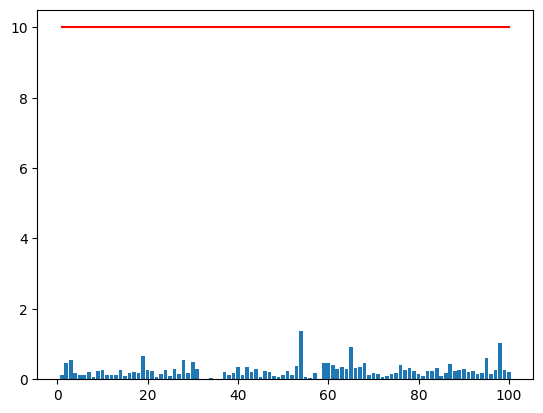

In [ ]:
no_df = pd.DataFrame({'score':smape_list})
plt.bar(np.arange(len(no_df))+1, no_df['score'])
plt.plot([1,100], [10, 10], color = 'red')

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/energe/test_process.csv")

In [ ]:
xgb_params['alpha'] = alpha_list
xgb_params['best_it'] = best_it
xgb_params.head()

,n_estimators,eta,min_child_weight,max_depth,colsample_bytree,subsample,alpha,best_it
0,100,0.01,6,8,0.9,0.9,25,486
1,100,0.01,7,4,0.8,0.9,50,265
2,100,0.01,7,3,0.9,0.9,50,203
3,100,0.01,1,5,0.9,0.9,1,300
4,100,0.01,7,4,0.9,0.9,50,414


In [ ]:
xgb_params.to_csv('/content/drive/MyDrive/energe/real_para_1csv', index=False)

In [9]:
 xgb_params = pd.read_csv('/content/drive/MyDrive/energe/real_para_1.csv')


In [10]:
xgb_params.head()

,n_estimators,eta,min_child_weight,max_depth,colsample_bytree,subsample,alpha,best_it
0,100,0.01,6,8,0.9,0.9,25,486
1,100,0.01,7,4,0.8,0.9,50,265
2,100,0.01,7,3,0.9,0.9,50,203
3,100,0.01,1,5,0.9,0.9,1,300
4,100,0.01,7,4,0.9,0.9,50,414


In [11]:
best_it = xgb_params['best_it'].to_list()
best_it[0]        # 1051

486

In [21]:
test = pd.read_csv("/content/drive/MyDrive/energe/test_process_1.csv")
train = pd.read_csv("/content/drive/MyDrive/energe/real_train_2.csv")

In [ ]:
test = test.iloc[:,1:]

In [28]:
test_1 = pd.read_csv("/content/drive/MyDrive/energe/test_process.csv")

In [30]:
test["num"] = test_1["num"]

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp           16800 non-null  float64
 1   wind           16800 non-null  float64
 2   hum            16800 non-null  int64  
 3   prec           16800 non-null  float64
 4   day            16800 non-null  int64  
 5   month          16800 non-null  int64  
 6   week           16800 non-null  int64  
 7   day_hour_mean  16800 non-null  float64
 8   hour_mean      16800 non-null  float64
 9   hour_std       16800 non-null  float64
 10  sin_time       16800 non-null  float64
 11  cos_time       16800 non-null  float64
 12  THI            16800 non-null  float64
 13  holiday        16800 non-null  int64  
 14  CDH            16800 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 1.9 MB


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num            204000 non-null  int64  
 1   date_time      204000 non-null  object 
 2   power          204000 non-null  float64
 3   temp           204000 non-null  float64
 4   wind           203981 non-null  float64
 5   hum            203991 non-null  float64
 6   prec           204000 non-null  float64
 7   day            204000 non-null  int64  
 8   month          204000 non-null  int64  
 9   week           204000 non-null  int64  
 10  day_hour_mean  204000 non-null  float64
 11  hour_mean      204000 non-null  float64
 12  hour_std       204000 non-null  float64
 13  sin_time       204000 non-null  float64
 14  cos_time       204000 non-null  float64
 15  THI            203991 non-null  float64
 16  holiday        204000 non-null  int64  
 17  CDH            204000 non-nul

In [20]:
train.to_csv("/content/drive/MyDrive/energe/real_train_2.csv",index = False)

In [35]:
test.to_csv("/content/drive/MyDrive/energe/real_test_2.csv",index = False)

In [33]:
test.columns

Index(['temp', 'wind', 'hum', 'prec', 'day', 'month', 'week', 'day_hour_mean',
       'hour_mean', 'hour_std', 'sin_time', 'cos_time', 'THI', 'holiday',
       'CDH', 'num'],
      dtype='object')

In [34]:
test = test.reindex(['num','temp',  'wind', 'hum', 'prec', 'day', 'month', 'week', 'day_hour_mean',
       'hour_mean', 'hour_std', 'sin_time', 'cos_time', 'THI', 'holiday',
       'CDH'],axis = 1)

In [ ]:
train = train.iloc[:,2:]
train.head()

,num,date_time,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,1,20220601 00,18.6,0.0,0.9,42.0,0.0,1085.28,2,6,22,1774.744615,446.882767,0,0.000000,1.000000,49.6576,-7.4
1,1,20220601 01,18.0,0.0,1.1,45.0,0.0,1047.36,2,6,22,1687.347692,439.662704,0,0.258819,0.965926,47.7625,-15.4
2,1,20220601 02,17.7,0.0,1.5,45.0,0.0,974.88,2,6,22,1571.483077,412.071906,0,0.500000,0.866025,47.2225,-23.7
3,1,20220601 03,16.7,0.0,1.4,48.0,0.0,953.76,2,6,22,1522.153846,391.205981,0,0.707107,0.707107,44.7856,-33.0
4,1,20220601 04,18.4,0.0,2.8,43.0,0.0,986.40,2,6,22,1506.793846,381.099697,0,0.866025,0.500000,49.0061,-40.6


In [ ]:
train = train.drop(columns = "sun")

In [36]:
test

,num,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
0,1,23.5,2.2,72,0.0,3,8,34,1627.800000,1706.318118,446.882767,0.000000,1.000000,58.3456,0,-2.5
1,1,23.0,0.9,72,0.0,3,8,34,1550.080000,1622.620235,439.662704,0.258819,0.965926,57.4456,0,-5.5
2,1,22.7,1.5,75,0.0,3,8,34,1431.120000,1506.971294,412.071906,0.500000,0.866025,57.8725,0,-8.8
3,1,22.1,1.3,78,0.0,3,8,34,1372.200000,1437.365647,391.205981,0.707107,0.707107,57.9376,0,-12.7
4,1,21.8,1.0,77,0.0,3,8,34,1381.720000,1447.321412,381.099697,0.866025,0.500000,56.9961,0,-16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,22.5,0.9,84,0.0,2,8,35,964.873846,1010.462118,161.399578,-0.965926,0.258819,61.4824,0,-34.5
16796,100,20.7,0.4,95,0.0,2,8,35,882.184615,928.125176,137.566008,-0.866025,0.500000,65.2725,0,-34.4
16797,100,20.2,0.4,98,0.0,2,8,35,779.095385,830.032941,128.300189,-0.707107,0.707107,66.7056,0,-35.3
16798,100,20.1,1.1,97,0.0,2,8,35,663.267692,723.100235,112.464079,-0.500000,0.866025,65.7281,0,-36.8


In [ ]:
a = pd.read_csv("/content/drive/MyDrive/energe/train_process.csv")

In [ ]:
train["power"]

0         1085.28
1         1047.36
2          974.88
3          953.76
4          986.40
           ...   
203995     881.04
203996     798.96
203997     825.12
203998     640.08
203999     540.24
Name: power, Length: 204000, dtype: float64

In [25]:
train.head()

,num,date_time,power,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
0,1,20220601 00,1085.28,18.6,0.9,42.0,0.0,2,6,22,1774.744615,1706.318118,446.882767,0.000000,1.000000,49.6576,0,-7.4
1,1,20220601 01,1047.36,18.0,1.1,45.0,0.0,2,6,22,1687.347692,1622.620235,439.662704,0.258819,0.965926,47.7625,0,-15.4
2,1,20220601 02,974.88,17.7,1.5,45.0,0.0,2,6,22,1571.483077,1506.971294,412.071906,0.500000,0.866025,47.2225,0,-23.7
3,1,20220601 03,953.76,16.7,1.4,48.0,0.0,2,6,22,1522.153846,1437.365647,391.205981,0.707107,0.707107,44.7856,0,-33.0
4,1,20220601 04,986.40,18.4,2.8,43.0,0.0,2,6,22,1506.793846,1447.321412,381.099697,0.866025,0.500000,49.0061,0,-40.6


In [ ]:
 y_train = train.loc[train.num == 1, 'power']

In [ ]:
y_train

0       1085.28
1       1047.36
2        974.88
3        953.76
4        986.40
         ...   
2035    2517.12
2036    2208.96
2037    1806.24
2038    1387.20
2039    1925.28
Name: power, Length: 2040, dtype: float64

In [ ]:
k = train.drop(columns = "power")

In [24]:
x_train, x_test = train.loc[train.num == 1, ].iloc[:, 3:], test.loc[test.num == 1, ].iloc[:,1:]
x_train.head()

AttributeError: ignored

In [129]:
train=df_train
test = df_test
train = train_df
test = test_df

In [131]:
train

,num,date_time,power,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,20220601 00,1085.28,0.314815,0.067669,0.333333,0.0,0.333333,0.0,0.0,0.064955,0.067940,0.110238,0.500000,1.000000,0.274138,0.0,0.599181,0.000000
1,1,20220601 01,1047.36,0.292593,0.082707,0.367816,0.0,0.333333,0.0,0.0,0.061089,0.063862,0.108395,0.629410,0.982963,0.240324,0.0,0.569408,0.043478
2,1,20220601 02,974.88,0.281481,0.112782,0.367816,0.0,0.333333,0.0,0.0,0.055963,0.058227,0.101349,0.750000,0.933013,0.230689,0.0,0.538519,0.086957
3,1,20220601 03,953.76,0.244444,0.105263,0.402299,0.0,0.333333,0.0,0.0,0.053781,0.054835,0.096020,0.853553,0.853553,0.187207,0.0,0.503908,0.130435
4,1,20220601 04,986.40,0.307407,0.210526,0.344828,0.0,0.333333,0.0,0.0,0.053102,0.055321,0.093439,0.933013,0.750000,0.262513,0.0,0.475623,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,881.04,0.481481,0.067669,0.839080,0.0,0.333333,1.0,1.0,0.029129,0.034035,0.037335,0.017037,0.629410,0.524024,0.0,0.553777,0.826087
203996,100,20220824 20,798.96,0.455556,0.097744,0.839080,0.0,0.333333,1.0,1.0,0.025472,0.030023,0.031248,0.066987,0.750000,0.501542,0.0,0.551544,0.869565
203997,100,20220824 21,825.12,0.414815,0.075188,0.908046,0.0,0.333333,1.0,1.0,0.020911,0.025244,0.028882,0.146447,0.853553,0.533573,0.0,0.543729,0.913043
203998,100,20220824 22,640.08,0.403704,0.022556,0.931034,0.0,0.333333,1.0,1.0,0.015788,0.020034,0.024838,0.250000,0.933013,0.549218,0.0,0.533309,0.956522


In [146]:
train = pd.read_csv("/content/drive/MyDrive/energe/real_train_2.csv")

In [147]:
train

,num,date_time,power,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
0,1,20220601 00,1085.28,18.6,0.9,42.0,0.0,2,6,22,1774.744615,1706.318118,446.882767,0.000000,1.000000,49.6576,0,-7.4
1,1,20220601 01,1047.36,18.0,1.1,45.0,0.0,2,6,22,1687.347692,1622.620235,439.662704,0.258819,0.965926,47.7625,0,-15.4
2,1,20220601 02,974.88,17.7,1.5,45.0,0.0,2,6,22,1571.483077,1506.971294,412.071906,0.500000,0.866025,47.2225,0,-23.7
3,1,20220601 03,953.76,16.7,1.4,48.0,0.0,2,6,22,1522.153846,1437.365647,391.205981,0.707107,0.707107,44.7856,0,-33.0
4,1,20220601 04,986.40,18.4,2.8,43.0,0.0,2,6,22,1506.793846,1447.321412,381.099697,0.866025,0.500000,49.0061,0,-40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,881.04,23.1,0.9,86.0,0.0,2,8,34,964.873846,1010.462118,161.399578,-0.965926,0.258819,63.6624,0,-19.6
203996,100,20220824 20,798.96,22.4,1.3,86.0,0.0,2,8,34,882.184615,928.125176,137.566008,-0.866025,0.500000,62.4024,0,-20.2
203997,100,20220824 21,825.12,21.3,1.0,92.0,0.0,2,8,34,779.095385,830.032941,128.300189,-0.707107,0.707107,64.1976,0,-22.3
203998,100,20220824 22,640.08,21.0,0.3,94.0,0.0,2,8,34,663.267692,723.100235,112.464079,-0.500000,0.866025,65.0744,0,-25.1


In [132]:
preds = np.array([])
for i in tqdm(range(100)):

    pred_df = pd.DataFrame()   # 시드별 예측값을 담을 data frame

    for seed in [0,1,2,3,4,5]: # 각 시드별 예측
        y_train = train.loc[train.num == i+1, 'power']
        x_train, x_test = train.loc[train.num == i+1, ].iloc[:, 3:], test.loc[test.num == i+1, ].iloc[:,1:]
        x_test = x_test[x_train.columns]

        xgb = XGBRegressor(seed = seed, n_estimators = best_it[i], eta = 0.01,
                           min_child_weight = xgb_params.iloc[i, 2], max_depth = xgb_params.iloc[i, 3],
                           colsample_bytree=xgb_params.iloc[i, 4], subsample=xgb_params.iloc[i, 5])

        if xgb_params.iloc[i,6] != 0:  # 만약 alpha가 0이 아니면 weighted_mse 사용
            xgb.set_params(**{'objective':weighted_mse(xgb_params.iloc[i,6])})

        xgb.fit(x_train, y_train)
        y_pred = xgb.predict(x_test)
        pred_df.loc[:,seed] = y_pred   # 각 시드별 예측 담기

    pred = pred_df.mean(axis=1)        # (i+1)번째 건물의 예측 =  (i+1)번째 건물의 각 시드별 예측 평균값
    preds = np.append(preds, pred)

100%|██████████| 100/100 [17:41<00:00, 10.61s/it]


In [133]:
submission = pd.read_csv('/content/drive/MyDrive/energe/submission_xgb_noclip.csv')
submission['answer'] = preds
submission.to_csv('/content/drive/MyDrive/energe/energy_sub_1.csv', index = False)

In [ ]:
train_to_post = pd.read_csv('./data/train.csv', encoding = 'cp949')
cols = ['num', 'date_time', 'power', 'temp', 'wind','hum' ,'prec', 'sun', 'non_elec', 'solar']
train_to_post.columns = cols
date = pd.to_datetime(train_to_post.date_time)
train_to_post['hour'] = date.dt.hour
train_to_post['day'] = date.dt.weekday
train_to_post['month'] = date.dt.month
train_to_post['week'] = date.dt.weekofyear
train_to_post = train_to_post.loc[(('2020-08-17'>train_to_post.date_time)|(train_to_post.date_time>='2020-08-18')), ].reset_index(drop = True)

pred_clip = []
test_to_post = pd.read_csv('./data/test.csv',  encoding = 'cp949')
cols = ['num', 'date_time', 'temp', 'wind','hum' ,'prec', 'sun', 'non_elec', 'solar']
test_to_post.columns = cols
date = pd.to_datetime(test_to_post.date_time)
test_to_post['hour'] = date.dt.hour
test_to_post['day'] = date.dt.weekday
test_to_post['month'] = date.dt.month
test_to_post['week'] = date.dt.weekofyear

## submission 불러오기
df = pd.read_csv('./submission/submission_xgb_noclip.csv')
for i in range(60):
    min_data = train_to_post.loc[train_to_post.num == i+1, ].iloc[-28*24:, :] ## 건물별로 직전 28일의 데이터 불러오기
    ## 요일별, 시간대별 최솟값 계산
    min_data = pd.pivot_table(min_data, values = 'power', index = ['day', 'hour'], aggfunc = min).reset_index()
    pred = df.answer[168*i:168*(i+1)].reset_index(drop=True) ## 168개 데이터, 즉 건물별 예측값 불러오기
    day =  test_to_post.day[168*i:168*(i+1)].reset_index(drop=True) ## 예측값 요일 불러오기
    hour = test_to_post.hour[168*i:168*(i+1)].reset_index(drop=True) ## 예측값 시간 불러오기
    df_pred = pd.concat([pred, day, hour], axis = 1)
    df_pred.columns = ['pred', 'day', 'hour']
    for j in range(len(df_pred)):
        min_power = min_data.loc[(min_data.day == df_pred.day[j])&(min_data.hour == df_pred.hour[j]), 'power'].values[0]
        if df_pred.pred[j] < min_power:
            pred_clip.append(min_power)
        else:
            pred_clip.append(df_pred.pred[j])

In [50]:
train.head()

,num,date_time,power,temp,wind,hum,prec,day,month,week,day_hour_mean,hour_mean,hour_std,sin_time,cos_time,THI,holiday,CDH
0,1,20220601 00,1085.28,18.6,0.9,42.0,0.0,2,6,22,1774.744615,1706.318118,446.882767,0.000000,1.000000,49.6576,0,-7.4
1,1,20220601 01,1047.36,18.0,1.1,45.0,0.0,2,6,22,1687.347692,1622.620235,439.662704,0.258819,0.965926,47.7625,0,-15.4
2,1,20220601 02,974.88,17.7,1.5,45.0,0.0,2,6,22,1571.483077,1506.971294,412.071906,0.500000,0.866025,47.2225,0,-23.7
3,1,20220601 03,953.76,16.7,1.4,48.0,0.0,2,6,22,1522.153846,1437.365647,391.205981,0.707107,0.707107,44.7856,0,-33.0
4,1,20220601 04,986.40,18.4,2.8,43.0,0.0,2,6,22,1506.793846,1447.321412,381.099697,0.866025,0.500000,49.0061,0,-40.6


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num            204000 non-null  int64  
 1   date_time      204000 non-null  object 
 2   power          204000 non-null  float64
 3   temp           204000 non-null  float64
 4   wind           203981 non-null  float64
 5   hum            203991 non-null  float64
 6   prec           204000 non-null  float64
 7   day            204000 non-null  int64  
 8   month          204000 non-null  int64  
 9   week           204000 non-null  int64  
 10  day_hour_mean  204000 non-null  float64
 11  hour_mean      204000 non-null  float64
 12  hour_std       204000 non-null  float64
 13  sin_time       204000 non-null  float64
 14  cos_time       204000 non-null  float64
 15  THI            203991 non-null  float64
 16  holiday        204000 non-null  int64  
 17  CDH            204000 non-nul

In [103]:
df = pd.DataFrame()

In [86]:
a = pd.read_csv("/train.csv")
df["time"] = a["num_date_time"].apply(lambda x: (x[-3:]))
df['time'] = df["time"].astype("str")

In [104]:
a = pd.read_csv("/test.csv")
df["time"] = a["num_date_time"].apply(lambda x: (x[-3:]))
df['time'] = df["time"].astype("str")

In [102]:
df["t"]

0          00
1          01
2          02
3          03
4          04
         ... 
203995    NaN
203996    NaN
203997    NaN
203998    NaN
203999    NaN
Name: time, Length: 204000, dtype: object

In [90]:
df['time'] = df["time"].astype("str")

In [105]:
df

,time
0,00
1,01
2,02
3,03
4,04
...,...
16795,19
16796,20
16797,21
16798,22


In [75]:
a["num_date_time"][10:]

10          1_20220601 10
11          1_20220601 11
12          1_20220601 12
13          1_20220601 13
14          1_20220601 14
               ...       
203995    100_20220824 19
203996    100_20220824 20
203997    100_20220824 21
203998    100_20220824 22
203999    100_20220824 23
Name: num_date_time, Length: 203990, dtype: object

In [ ]:
df_train['time'] = df_train['datetime'].map(lambda x: int(x[10:]))


In [93]:
train["time"] =df["time"]

In [106]:
test["time"]= df["time"]

In [127]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(train.iloc[:,3:])

# 데이터 변환
mMscaled_data = mMscaler.transform(train.iloc[:,3:])

# 데이터 프레임으로 저장
mMscaled_data = pd.DataFrame(mMscaled_data)
train_df =pd.concat( [train.iloc[:,:3],mMscaled_data,],axis = 1)

In [125]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(test.iloc[:,1:])

# 데이터 변환
mMscaled_data = mMscaler.transform(test.iloc[:,1:])

# 데이터 프레임으로 저장
mMscaled_data = pd.DataFrame(mMscaled_data)
test_df =pd.concat( [test.iloc[:,:1],mMscaled_data,],axis = 1)

In [120]:
train_df =pd.concat( [train.iloc[:,:3],mMscaled_data,],axis = 1
)

In [128]:
train_df

,num,date_time,power,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,20220601 00,1085.28,0.314815,0.067669,0.333333,0.0,0.333333,0.0,0.0,0.064955,0.067940,0.110238,0.500000,1.000000,0.274138,0.0,0.599181,0.000000
1,1,20220601 01,1047.36,0.292593,0.082707,0.367816,0.0,0.333333,0.0,0.0,0.061089,0.063862,0.108395,0.629410,0.982963,0.240324,0.0,0.569408,0.043478
2,1,20220601 02,974.88,0.281481,0.112782,0.367816,0.0,0.333333,0.0,0.0,0.055963,0.058227,0.101349,0.750000,0.933013,0.230689,0.0,0.538519,0.086957
3,1,20220601 03,953.76,0.244444,0.105263,0.402299,0.0,0.333333,0.0,0.0,0.053781,0.054835,0.096020,0.853553,0.853553,0.187207,0.0,0.503908,0.130435
4,1,20220601 04,986.40,0.307407,0.210526,0.344828,0.0,0.333333,0.0,0.0,0.053102,0.055321,0.093439,0.933013,0.750000,0.262513,0.0,0.475623,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,881.04,0.481481,0.067669,0.839080,0.0,0.333333,1.0,1.0,0.029129,0.034035,0.037335,0.017037,0.629410,0.524024,0.0,0.553777,0.826087
203996,100,20220824 20,798.96,0.455556,0.097744,0.839080,0.0,0.333333,1.0,1.0,0.025472,0.030023,0.031248,0.066987,0.750000,0.501542,0.0,0.551544,0.869565
203997,100,20220824 21,825.12,0.414815,0.075188,0.908046,0.0,0.333333,1.0,1.0,0.020911,0.025244,0.028882,0.146447,0.853553,0.533573,0.0,0.543729,0.913043
203998,100,20220824 22,640.08,0.403704,0.022556,0.931034,0.0,0.333333,1.0,1.0,0.015788,0.020034,0.024838,0.250000,0.933013,0.549218,0.0,0.533309,0.956522


In [126]:
test_df

,num,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.562189,0.314286,0.621622,0.0,0.500000,0.0,0.0,0.058455,0.067940,0.110238,0.500000,1.000000,0.412431,0.0,0.728822,0.000000
1,1,0.537313,0.128571,0.621622,0.0,0.500000,0.0,0.0,0.055017,0.063862,0.108395,0.629410,0.982963,0.386070,0.0,0.713784,0.043478
2,1,0.522388,0.214286,0.662162,0.0,0.500000,0.0,0.0,0.049754,0.058227,0.101349,0.750000,0.933013,0.398574,0.0,0.697243,0.086957
3,1,0.492537,0.185714,0.702703,0.0,0.500000,0.0,0.0,0.047148,0.054835,0.096020,0.853553,0.853553,0.400481,0.0,0.677694,0.130435
4,1,0.477612,0.142857,0.689189,0.0,0.500000,0.0,0.0,0.047569,0.055321,0.093439,0.933013,0.750000,0.372904,0.0,0.656642,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,0.512438,0.128571,0.783784,0.0,0.333333,0.0,1.0,0.029129,0.034035,0.037335,0.017037,0.629410,0.504310,0.0,0.568421,0.826087
16796,100,0.422886,0.057143,0.932432,0.0,0.333333,0.0,1.0,0.025472,0.030023,0.031248,0.066987,0.750000,0.615324,0.0,0.568922,0.869565
16797,100,0.398010,0.057143,0.972973,0.0,0.333333,0.0,1.0,0.020911,0.025244,0.028882,0.146447,0.853553,0.657301,0.0,0.564411,0.913043
16798,100,0.393035,0.157143,0.959459,0.0,0.333333,0.0,1.0,0.015788,0.020034,0.024838,0.250000,0.933013,0.628669,0.0,0.556892,0.956522


In [107]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num            16800 non-null  int64  
 1   temp           16800 non-null  float64
 2   wind           16800 non-null  float64
 3   hum            16800 non-null  int64  
 4   prec           16800 non-null  float64
 5   day            16800 non-null  int64  
 6   month          16800 non-null  int64  
 7   week           16800 non-null  int64  
 8   day_hour_mean  16800 non-null  float64
 9   hour_mean      16800 non-null  float64
 10  hour_std       16800 non-null  float64
 11  sin_time       16800 non-null  float64
 12  cos_time       16800 non-null  float64
 13  THI            16800 non-null  float64
 14  holiday        16800 non-null  int64  
 15  CDH            16800 non-null  float64
 16  time           16800 non-null  object 
dtypes: float64(10), int64(6), object(1)
memory usage: 

In [44]:
train.columns

Index(['num', 'date_time', 'power', 'temp', 'wind', 'hum', 'prec', 'day',
       'month', 'week', 'day_hour_mean', 'hour_mean', 'hour_std', 'sin_time',
       'cos_time', 'THI', 'holiday', 'CDH'],
      dtype='object')

In [47]:
# basic
import pandas as pd
import numpy as np

# cross validation
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold

# model
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from tqdm import tqdm_notebook

#plot
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
cols =[ 'temp', 'wind', 'hum', 'prec', 'day',
       'month', 'week', 'day_hour_mean', 'hour_mean', 'hour_std', 'sin_time',
       'cos_time', 'THI', 'holiday', 'CDH']

In [48]:
df_train =train
df_test = test

In [49]:
train.index

RangeIndex(start=0, stop=204000, step=1)

In [108]:
def lgbm_smape(y_true, y_pred):
    smape_val = smape(y_true, y_pred)
    return 'SMAPE', smape_val, False

In [114]:
y_val

11      2730.72
14      2630.40
20      1753.92
22      1175.52
23      1105.44
         ...   
2019    1958.40
2022    2450.40
2028    4361.28
2030    4287.36
2035    2517.12
Name: power, Length: 408, dtype: float64

In [115]:
val_index

array([  11,   14,   20,   22,   23,   24,   32,   47,   51,   52,   54,
         61,   63,   65,   66,   68,   69,   75,   77,   84,   96,  101,
        103,  108,  109,  115,  116,  121,  123,  127,  132,  134,  136,
        138,  143,  144,  146,  149,  158,  160,  166,  170,  174,  175,
        176,  177,  182,  190,  192,  194,  198,  203,  205,  208,  226,
        232,  239,  245,  246,  249,  251,  254,  256,  260,  263,  266,
        269,  270,  277,  283,  303,  319,  325,  331,  337,  338,  344,
        348,  349,  359,  369,  376,  385,  388,  389,  392,  393,  398,
        402,  405,  410,  411,  414,  422,  433,  437,  440,  441,  445,
        446,  450,  457,  464,  466,  471,  474,  477,  480,  484,  486,
        487,  490,  494,  495,  510,  511,  516,  533,  536,  538,  547,
        551,  567,  572,  575,  576,  593,  597,  604,  605,  622,  624,
        627,  652,  665,  666,  668,  675,  677,  680,  684,  688,  691,
        698,  704,  713,  717,  718,  719,  735,  7

In [113]:
#LGBMRegressor
lgb_oof =   np.zeros(len(df_train))
lgb_preds = np.zeros(len(df_test))

split = 5
model = LGBMRegressor(n_estimators=20000, min_child_samples=10,learning_rate=0.01, random_state=42)


kf = StratifiedKFold(n_splits=split, shuffle=True, random_state=42)

#건물 마다 모델 생성
for n in tqdm_notebook(range(1,101)):
  # print('num : ',n)
  df_train2 = df_train[df_train['num']==n]
  df_test2 = df_test[df_test['num']==n]

  train_idx = df_train2.index
  test_idx = df_test2.index

  oof2 =   np.zeros(len(df_train2))
  preds2 = np.zeros(len(df_test2))
  for fold_, (train_index, val_index) in enumerate(kf.split(df_train2, df_train2['time'])):

        # print("Fold idx:{}".format(fold_ + 1))

        X_train, X_val = df_train2[cols].iloc[train_index], df_train2[cols].iloc[val_index]
        y_train, y_val = df_train2['power'].iloc[train_index], df_train2['power'].iloc[val_index]
        evals = [(X_train,y_train),(X_val, y_val)]

        model.fit(X_train, y_train, early_stopping_rounds=50, eval_metric=lgbm_smape, eval_set=evals,
                    verbose=0)

        oof2[val_index] += model.predict(df_train2.iloc[val_index][cols])
        preds2 += model.predict(df_test2[cols])/split

  # print(smape(df_train2['target'], oof2))
  lgb_oof[train_idx] = oof2
  lgb_preds[test_idx] = preds2
print(smape(df_train['target'], lgb_oof))

<ipython-input-113-94c978b16fa2>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(1,101)):


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


TypeError: ignored